<a href="https://colab.research.google.com/github/ErickMM98/NetworkAnalysis_TwitterTrends/blob/main/NetworkAnalysis_TwitterTrends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Grafica series de tiempo**

In [ ]:
pip install https://github.com/thibaudmartinez/node2vec/releases/download/v0.1.0/node2vec-0.1.0-cp37-cp37m-linux_x86_64.whl

     |████████████████████████████████| 5.6MB 4.3MB/s 
     |████████████████████████████████| 194kB 7.0MB/s 
     |████████████████████████████████| 20.1MB 1.4MB/s 
     |████████████████████████████████| 24.2MB 47.6MB/s 
     |████████████████████████████████| 450kB 31.2MB/s 
     |████████████████████████████████| 1.6MB 25.9MB/s 
  Created wheel for psutil: filename=psutil-5.6.7-cp37-cp37m-linux_x86_64.whl size=277283 sha256=9b51b6fb0c1a56e85d12dff29b92e5f1ba4f8cde2792504073b851664600d3b4
  Stored in directory: /root/.cache/pip/wheels/52/41/b0/bf50409fe2b1d3b79afa3eed71b54b3e30fe5b695db2c7ba2e
Successfully built psutil
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.18.0 which is incompatible.
ERROR: kapre 0.3.5 has requirement numpy>=1.18.5, but you'll have numpy 1.18.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<

In [ ]:
###### Data
 
yolodf = None
fig = plt.figure(figsize = (15,15))
for name_h in name_all_hastag:
  #wihtelist = ['wheniwaslittle', 'oomf','yolo','10factsaboutme','sorrynotsorry']
  wihtelist = ['oomf',
               'np',
               'nf',
               'ff',
               'teamfollowback',
               'bahrain',
               'rt',
               'thoughtsduringschool',
               'yolo',
               'dearoomf']
  #wihtelist = ['youvedoneittoo',
  #             'iwonderif',
  #             'weed',
  #             'truestory '
  #             'immadbecause',
  #             'butyouathug',
  #             'stfu',
  #             'bored',
  #             'ifweweretogetherrightnow',
  #             'icantlivewithout',
  #             'thatdepressingmoment']
  #wihtelist = ['yolo']
  #wihtelist = ['bored']
 
  #if name_h in wihtelist:
  if True:
    prueba = name_all_hastag[name_h]
    #del prueba[0]
    prueba = [ k.split(',') for k in prueba ]
    df_final = pd.DataFrame(prueba, columns = ['time','userid'])
    #path_final_csv = '/content/gen_csv/{}.csv'.format(name_h)
    #df_final.to_csv(path_or_buf=path_final_csv)
    df_final['time'] = pd.to_datetime(df_final['time'],unit='s')
 
    df_final['day'] = df_final['time'].apply(giveday)
    days = df_final.groupby('day')
    daycount = days['day'].count()
    timedict = daycount.to_dict()
 
    plt.plot(list(timedict.keys()),  np.log10(list(timedict.values())),
             label = "#{}; n = {}".format(name_h,
                                          np.sum(list(timedict.values()))))
    #plt.xticks(list(timedict.keys()), fontsize=15, rotation=90)
    #yolodf = df_final
 
plt.title("Serie de tiempo de tendencias con al menos 4000  $tweets$ a través del tiempo.")
plt.ylabel("$log$(Cantidad de $tweets$).")
plt.xlabel("84 = 24 de Marzo de 2012")
#plt.legend()
plt.grid()
#plt.show()
plt.savefig(fname = "/content/images/ts_tweets_allforall.pdf")

NameError: ignored

<Figure size 1080x1080 with 0 Axes>

# **Visualización de una tendencia**

In [ ]:
G_auxiliar = None
 
def get_plots_trend(name_trend):
  """
  Function to make a beauty presentation
  """
  ##### DATA SET
 
  xlabel_time = []
  entropy_time = []
  betweenes_time = []
 
  #### SERIE DE TIEMPO
 
  yolodf = None
  fig = plt.figure(figsize = (20,20))
 
  for name_h in name_all_hastag:
    if name_h == name_trend:
      prueba = name_all_hastag[name_h]
      prueba = [ k.split(',') for k in prueba ]
      df_final = pd.DataFrame(prueba, columns = ['time','userid'])
      df_final['time'] = pd.to_datetime(df_final['time'],unit='s')
 
      df_final['day'] = df_final['time'].apply(giveday)
      days = df_final.groupby('day')
      daycount = days['day'].count()
      timedict = daycount.to_dict()
      plt.subplot(221)
      plt.plot(list(timedict.keys()), list(timedict.values()),
              label = "#{}; n = {}".format(name_h,
                                            np.sum(list(timedict.values()))),
               color = "red")
      yolodf = df_final
 
  plt.title("Serie de tiempo de $tweets$ de #{}".format(name_trend))
  plt.ylabel("Cantidad de $tweets$.")
  plt.xlabel("84 = 24 de Marzo de 2012")
  plt.grid()
 
 
 
  #### ESTUDIO POR DIAS
  data_follow = get_data_followers_and_friends()


  user_study = np.unique(yolodf['userid'])
  days_study = np.unique(yolodf['day'])
  all_links_social_study = data_follow[data_follow['source'].isin(user_study)]
  for day in days_study:
    tweets_for_day = yolodf[yolodf['day'] == day]
    edge_links_day = data_follow[data_follow['source'].isin(tweets_for_day['userid'])]
    #Por hora
    tweets_for_day['hour'] = tweets_for_day['time'].apply(givehour)
    hours = tweets_for_day.groupby('hour')
    entropy_by_days = []
    betweenes_by_days = []
    for hour in np.unique(tweets_for_day['hour']):
      tweets_for_hour = tweets_for_day[tweets_for_day['hour'] == hour]
      ## 50 tweets
      n_tweets = tweets_for_hour.shape[0]
      if n_tweets > 50:
        tweets_for_hour.sample(n=50, random_state=1)
      edge_links_hour = edge_links_day[edge_links_day['source'].isin(tweets_for_hour['userid'])]
 
      #MAKE A GRAPH
      G_follow = nx.Graph()
      nx.from_pandas_edgelist(df = edge_links_hour,
                          source = 'source',
                          target = 'target',
                          create_using=G_follow)
      
      kj = min([int(G_follow.number_of_nodes() / 4),100])
      
      #RETURN DATETIME
      #oficial_time =  pd.Timedelta(day, unit = 'day') + pd.Timedelta(hour, unit = 'h')
 
      #oficial_time =  day + hour/24
 
      #Some metrics
      g_entropy = entropy_of_graph(G_follow)
      g_betweenes = 0
      try:
        g_betweenes = np.nanmean(list( nx.betweenness_centrality(G_follow, k=kj).values() ) )
      except:
        print("Hay un error aquí.")
        g_betweenes = 0
        G_auxiliar = G_follow
 
      #Add data
      #xlabel_time.append(oficial_time)
      entropy_by_days.append(g_entropy)
      betweenes_by_days.append(g_betweenes)
    xlabel_time.append(day)
    entropy_time.append(np.median(entropy_by_days))
    betweenes_time.append(np.nanmean(betweenes_by_days))
 
 
 
  #### ENTROPÍA 
  plt.subplot(222)
  plt.title("Entropía de #{} a través del tiempo".format(name_trend))
  plt.xlabel('84 = 24 de Marzo de 2012')
  plt.ylabel('Entropía')
  plt.grid()
  plt.plot(xlabel_time,entropy_time)
 
  #### BETWEENES 
 
  plt.subplot(223)
  plt.title("$Betweenes$ de #{} a través del tiempo".format(name_trend))
  plt.xlabel('84 = 24 de Marzo de 2012')
  plt.ylabel('Centralidad')
  plt.grid()
  plt.plot(xlabel_time,betweenes_time)
 
  
  ###Distribución de grado 
  G = nx.Graph()
  #social_data = data_follow[data_follow['source'].isin(yolodf['userid'])]
  nx.from_pandas_edgelist(df = all_links_social_study,
                          source = 'source',
                          target = 'target',
                          create_using=G)
  plt.subplot(224)
  plt.title("Distribución de grado")
  degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
  degreeCount = collections.Counter(degree_sequence)
  deg, cnt = zip(*degreeCount.items())
  plt.bar(np.log10(deg), np.log10(cnt), width=0.4, color="gray")
  plt.xlabel(r'$log(k)$')
  plt.ylabel('$log(P_k)$')
  #plt.ylim([0,100])
 
  #plt.savefig(fname = "/content/images/info_trend_{}.pdf".format(name_trend))
 
 
 
##### MAIN
 
get_plots_trend("bored")

## Función auxiliar para comprimir carpetas

In [ ]:
!zip -r /content/respaldo_gephi.zip /content/data_comunity/

In [ ]:
ntweets = 000
all_tweets = None
name_all_hastag00 = {}
with open(path_tweets_users, 'r') as reader:
  namehashatag = None
  for line in reader:
    list_tweets = line.split()
    namehashatag = list_tweets[0]
    count_tw = len(list_tweets) - 1
    if True:
      name_all_hastag00[namehashatag] = count_tw
 
print(len(name_all_hastag00.keys()))
print(np.sum(list(name_all_hastag00.values())))

# Nueva organización. Por capas


# **Funciones básicas**

## Algunas instalaciones


In [ ]:
!pip install networkit

In [ ]:
import tarfile
import pandas as pd
import numpy as np
import networkx as nx
#import networkit as nk
import matplotlib.pyplot as plt
import datetime as dt
import collections
import itertools
import random
import seaborn as sn
import threading
import os
 
#GENERAL VALUES (secret values to public)
 
main_seed = 123456789
np.random.seed(main_seed)
 
path_main_drive = "/content/drive/My Drive/NetworkAnalysis_TwitterTrends/virality2013.tar.gz"
path_friends_followers = "/content/follower_gcc.anony.dat"
path_tweets_users = "/content/timeline_tag.anony.dat"
path_retweets_users = "/content/timeline_tag_rt.anony.dat"
path_mentions_users = "/content/timeline_tag_men.anony.dat"
 
def extract_file_from_drive():
  """
  Function to extract all the data files.
  Just for the first time. 
  """
  my_tar = tarfile.open(path_main_drive)
  my_tar.extractall('//content')
  my_tar.close()  
 
def get_data_followers_and_friends():
  """
  Function to get a dataframe for the file with 
  the basic relation of mutual follow.
 
  return @Dataframe 
  """
  data = pd.read_csv(path_friends_followers,
                     sep=' ',
                     #nrows = 10000000,
                     names=['source', 'target'])
  return data
 
def get_data_tweets_time():
  """
  Function to get a dataframe for the file with 
  the basic relation of mutual follow.
 
  return @Dataframe 
  """
  data = pd.read_csv(path_tweets_users,
                     sep=' ',
                     nrows = 100)
                     #names=['source', 'target'])
  return data
 
 
def get_data_retweets_time():
  """
  Function to get a dataframe for the file with 
  the basic relation of mutual follow.
 
  return @Dataframe 
  """
  pass
 
def get_data_mentions_time():
  """
  Function to get a dataframe for the file with 
  the basic relation of mutual follow.
 
  return @Dataframe 
  """
  pass
 
def givehour(timestamp):
    day_string = timestamp.hour
    return day_string
 
def giveday(timestamp):
    day_string = timestamp.dayofyear
    return day_string
 
"""
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
------------------------ Plot beauty networks ---------------------------------
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
"""
 
 
def plot_social_network():
  """
  Function to plot fancy social network
  """

### **Extracción de datos** 

In [ ]:
"""
FUNCIONES PARA LEER LA INFORMACIÓN
"""
K_number_tweets = 4000
#K_number_tweets = 0
"""
OBTENER LA INFOR COMO DICCIONARIOS.
"""
 
def get_dic_tweets():
  """
  TWEETS
  Función para leer la info en un diccionario
  """
  name_all_hastag = {}
  with open(path_tweets_users, 'r') as reader:
    for line in reader:
      list_tweets = line.split()
      namehashatag = list_tweets.pop(0)
      count_tw = len(list_tweets)
      if count_tw >  K_number_tweets:
        name_all_hastag[namehashatag] = list_tweets
  return name_all_hastag
 
def get_dic_retweets():
  """
  RETWEETS
  Función para leer la info en un diccionario
  """
  name_all_hastag = {}
  with open(path_retweets_users, 'r') as reader:
    for line in reader:
      list_tweets = line.split()
      namehashatag = list_tweets.pop(0)
      name_all_hastag[namehashatag] = list_tweets
  return name_all_hastag
 
def get_dic_mentions():
  """
  MENCIONES
  Función para leer la info en un diccionario
  """
  name_all_hastag = {}
  with open(path_mentions_users, 'r') as reader:
    for line in reader:
      list_tweets = line.split()
      namehashatag = list_tweets.pop(0)
      name_all_hastag[namehashatag] = list_tweets
  return name_all_hastag
 
extract_file_from_drive()
 
#Toda la info
dic_tweets_user = get_dic_tweets()
dic_retweets_user = get_dic_retweets()
dic_mentions_user = get_dic_mentions()
 
 
#Vamos a tomar las tendencias que coincidan.
set_trend_tweets = set(dic_tweets_user.keys())
set_trend_retweets = set(dic_retweets_user.keys())
set_trend_menntions = set(dic_mentions_user.keys())
 
#Variables generales
list_trends = list(set_trend_menntions & set_trend_retweets & set_trend_tweets )
df_mutual_follow = get_data_followers_and_friends()

In [ ]:
def make_graphs_last_model(trend,count_i,count_j):
  #GENERAMOS LOS DATAFRAMES
 
  #TWEETS
  df_rel_tweets = pd.DataFrame([ k.split(',') for k in dic_tweets_user[trend]]
                   , columns = ['time','userid'])
  df_rel_tweets['time'] = pd.to_datetime(df_rel_tweets['time'],unit='s')
 
  df_rel_tweets['day'] = df_rel_tweets['time'].apply(giveday)
  df_rel_tweets['hour'] = df_rel_tweets['time'].apply(givehour)
 
  """
  days = df_rel_tweets.groupby('day')
  daycount = days['day'].count()
  timedict = daycount.to_dict()
  
  plt.plot(list(timedict.keys()), list(timedict.values()),
          label = "#{}; n = {}".format(trend,
                                        np.sum(list(timedict.values()))),
            color = "red")
  plt.legend()
  plt.show()
  """
  
  #RETWEETS
  df_rel_retweets = pd.DataFrame([ k.split(',') for k in dic_retweets_user[trend]]
                   , columns = ['time','target','source'])
  df_rel_retweets['time'] = pd.to_datetime(df_rel_retweets['time'],unit='s')
 
  df_rel_retweets['day'] = df_rel_retweets['time'].apply(giveday)
  df_rel_retweets['hour'] = df_rel_retweets['time'].apply(givehour)
 
  #MENTIONS
  df_rel_mentions = pd.DataFrame([ k.split(',') for k in dic_mentions_user[trend]]
                   , columns = ['time','source','target'])
  df_rel_mentions['time'] = pd.to_datetime(df_rel_mentions['time'],unit='s')
 
  df_rel_mentions['day'] = df_rel_mentions['time'].apply(giveday)
  df_rel_mentions['hour'] = df_rel_mentions['time'].apply(givehour)
 
  
  #VAMOS A SACAR LOS DÍAS Y HORAS DE OPERACIÓN
  set_days_to_tweets = set(pd.unique(df_rel_tweets['day']).tolist())
  set_days_to_retweets = set(pd.unique(df_rel_retweets['day']).tolist())
  set_days_to_mentions = set(pd.unique(df_rel_mentions['day']).tolist())
  study_days = list( set_days_to_tweets | set_days_to_retweets | set_days_to_mentions)
  
 
  sum_p =0 
  final_df = []
  for day in study_days:
    for hour in range(0,24):
      sub_list = list()
      make_noise ="{} / {} --- {} ----------------> DAY {} - HOUR {} ".format(count_i,
                                                                              count_j,
                                                                              trend,
                                                                              day,
                                                                              hour) 
      print(make_noise)
      #-----------------------------PARA TWEETS
      tweets_for_day = df_rel_tweets[df_rel_tweets['day'] == day]
      tweets_for_hour = tweets_for_day[tweets_for_day['hour'] == hour]
      best_sample = pd.unique(tweets_for_hour['userid'])
      edge_tweets_for_hour = df_mutual_follow[df_mutual_follow['source'].isin(best_sample)]
 
      nsize = Ntwets = edge_tweets_for_hour.shape[0]
      f_limit = 10000
      #
      #if nsize > f_limit:
      #  edge_tweets_for_hour = edge_tweets_for_hour.sample(n = f_limit,
      #                                                     random_state = np.random.RandomState(main_seed))
      #Por hora
 
      
 
      G_tweets = nx.Graph()
      nx.from_pandas_edgelist(df = edge_tweets_for_hour,
                          source = 'source',
                          target = 'target',
                          create_using=G_tweets)
 
      #A LO MÁS 10,000 NODOS
 
      if len(G_tweets) > f_limit:
        sample = np.random.choice(np.array(list(G_tweets.nodes)),size=2500)
        G_tweets = G_tweets.subgraph(sample)
 
      kj = min([int(G_tweets.number_of_nodes() / 4),100])
 
      #METRICS
      Ntwets = tweets_for_hour.shape[0]
      STweets = entropy_of_graph(G_tweets)
      
      g_betweenes = 0
      try:
        g_betweenes = np.nanmean(list( nx.betweenness_centrality(G_tweets, k=kj).values() ) )
        if pd.isnull(g_betweenes):
          g_betweenes = 0
      except:
        g_betweenes = 0
      
 
      
      g_clustering = get_clustering_grapg(G_tweets)
 
      mean_k = mean_degree(G_tweets)
      mean_L = mean_shortest_path(G_tweets)
 
 
 
      #------------------------------PARA RETWEETS
      retweets_for_day = df_rel_retweets[df_rel_retweets['day'] == day]
      edges_retweets_for_hour = retweets_for_day[retweets_for_day['hour'] == hour]
 
      G_retweets = nx.DiGraph()
      nx.from_pandas_edgelist(df = edges_retweets_for_hour,
                          source = 'source',
                          target = 'target',
                          create_using=G_retweets)
 
 
      #METRICS
      Nretwets = edges_retweets_for_hour.shape[0]
 
      diam_retweets = mean_diameter(G_retweets)
      vecin_retweets = get_vecindad_mas_grande(G_retweets)
 
 
 
      
 
      #------------------------------PARA MENTIONS
      mentions_for_day = df_rel_mentions[df_rel_mentions['day'] == day]
      edges_mentions_for_hour = mentions_for_day[mentions_for_day['hour'] == hour]
 
      G_mentions = nx.DiGraph()
      nx.from_pandas_edgelist(df = edges_mentions_for_hour,
                          source = 'source',
                          target = 'target',
                          create_using=G_mentions)
 
      #METRICS
      Nmentions = edges_mentions_for_hour.shape[0]
 
      diam_mentions = mean_diameter(G_mentions)
      vecin_mentions = get_vecindad_mas_grande(G_mentions)
 
 
      """
      ADD DATA
      """
      sub_list.append(day)
      sub_list.append(hour)
      sub_list.append(Ntwets)
      sub_list.append(Nretwets)
      sub_list.append(Nmentions)
 
      sub_list.append(mean_k)
      sub_list.append(mean_L)
 
      sub_list.append(g_clustering)
      sub_list.append(g_betweenes)
      sub_list.append(STweets)
 
      sub_list.append(diam_retweets)
      sub_list.append(vecin_retweets)
 
      sub_list.append(diam_mentions)
      sub_list.append(vecin_mentions)
 
      final_df.append(sub_list)
 
      columns = ["day",
                 "hour",
                 "ntweets",
                 "nretweets",
                 "nmentions",
                 "k",
                 "L",
                 "clustering",
                 "betweenness",
                 "entropy",
                 "diam_rt",
                 "v_rt",
                 "diam_ment",
                 "v_ment"]
  return pd.DataFrame(data=final_df, columns= columns)
#A = make_graphs_last_model(trend)

## **Métricas**


In [ ]:
def count_tweets(G):
  pruebadata = list( list(k[2].values()) for k in list(G.edges(data = True)))
  pruebadata = [ extract_numeric_sum_data(edge_list) for edge_list in pruebadata]
 
  degree_sequence = sorted(pruebadata, reverse=True)
  N = np.sum(degreeCount)
  return N
 
def extract_numeric_sum_data(somelist):
  sum_final = 0
  for i in somelist:
    try:
      int(i)
      sum_final += int(i)
    except:
      continue
  return sum_final
 
def strong_edge(G):
  G_degree = dict(G.degree())
  final_list = []
  for edge in G.edges:
    s = edge[0]
    t = edge[1]
    k_s = G_degree[s]
    k_t = G_degree[t]
    n_cneig = len(list(nx.common_neighbors(G, s, t)))
    if n_cneig == 0:
      final_list.append(0)
    else:
      final_list.append(n_cneig / (k_s - 1 + k_t - 1 - n_cneig ))
  return np.mean(final_list)

def dict_strong_edge(G):
  G_degree = dict(G.degree())
  final_list = []
  for edge in G.edges:
    s = edge[0]
    t = edge[1]
    k_s = G_degree[s]
    k_t = G_degree[t]
    n_cneig = len(list(nx.common_neighbors(G, s, t)))
    if n_cneig == 0:
      final_list.append(0)
    else:
      final_list.append(n_cneig / (k_s - 1 + k_t - 1 - n_cneig ))
  return np.mean(final_list)
 
def edge_entropy_of_graph(G):
  pruebadata = list( list(k[2].values()) for k in list(G.edges(data = True)))
  pruebadata = [ extract_numeric_sum_data(edge_list) for edge_list in pruebadata]
 
  degree_sequence = sorted(pruebadata, reverse=True)
  degreeCount = list(dict(collections.Counter(degree_sequence)).values())
  N = np.sum(degreeCount)
  vectorprobs = 1/N * np.array(degreeCount)
  entropy =  np.sum(vectorprobs * np.log2(1/vectorprobs))
  return entropy
 
def edge_strong_of_graph_compose(G):
  #STRONG EDGE
  edges_final_strong = []
  for edge_aux in g_compose_nd.edges():
    source = edge_aux[0]
    target = edge_aux[1]
    #Cantidad de vecinos en común
    n_ij = len(list(nx.common_neighbors(g_compose_nd, source, target)))
    k_s = g_compose_nd.degree(source)
    k_t = g_compose_nd.degree(target)
    o_ij = 0
    try:
      o_ij = n_ij / ( ( k_s - 1) + (k_t - 1) - n_ij) 
    except:
      o_ij = 0
    edges_final_strong.append(o_ij)
  return np.mean(edges_final_strong)
 
def entropy_of_graph(G):
  """
  Function to get the entropy of a graph
 
  Con pesos 1
  G : @nx.Graph A graph non directed
 
  return @float The entropy of the graph G
  """
  degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
  N = G.number_of_nodes()
  if N == 0:
    return 0
  degreeCount = list(dict(collections.Counter(degree_sequence)).values())
  vectorprobs = 1/N * np.array(degreeCount)
  entropy =  np.sum(vectorprobs * np.log2(1/vectorprobs))
  return entropy
 
def get_vecindad_mas_grande(G):
  try:
    degree_sequence = [d for n, d in G.degree()]
    if len(degree_sequence) == 0:
      return 0
    else:
      return np.max( degree_sequence)
  except:
    return 0
 
def mean_degree(G):
  try:
    degree_sequence = [d for n, d in G.degree()]
    if len(degree_sequence) == 0:
      return 0
    else:
      return np.mean( degree_sequence)
  except:
    return 0
 
def mean_shortest_path(G):
  try:
    largest_cc = list(max(nx.connected_components(G), key=len))
    Gc = G.subgraph(largest_cc).copy()
    return nx.average_shortest_path_length(Gc)
  except:
    return 0
 
def mean_diameter(G):
  try:
    largest_cc = list(max(nx.algorithms.components.weakly_connected_components(G), key=len))
    if len(largest_cc) == 0:
      return 0
    else:
      G_aux = G.subgraph(largest_cc).copy().to_undirected()
      ex = nx.algorithms.distance_measures.diameter(G_aux)
      return ex
  except:
      return 0
 
def get_timeserie_three_grpahs(G1):
  "Dada una gráfica, obten su serie de tiempo"
  try:
    timeserie = list(itertools.chain.from_iterable(list( edge[2]['tTweets'] for edge in list(G.edges(data = True)))))
  except:
    pass
  try:
    timeserie = list(itertools.chain.from_iterable(list( edge[2]['tReTweets'] for edge in list(G.edges(data = True)))))
  except:
    pass
  try:
    timeserie = list(itertools.chain.from_iterable(list( edge[2]['tMenTweets'] for edge in list(G.edges(data = True)))))
  except:
    pass
  return timeserie
 
def get_rel_clustering_by_time(G1):
  pass
 
def get_diameter(G1):
  try:
    try:
      if not nx.is_connected(G1):
        ndirigida = nx.algorithms.components.connected_components(G1)
        max = 0
        set_final = None
        for k in ndirigida:
          if len(k) > max:
            max = len(k)
            set_final = list(k)
        G1 = G1.subgraph(set_final)
        return nx.algorithms.distance_measures.diameter(G1)
      else:
        return nx.algorithms.distance_measures.diameter(G1)
    except:
      G1 = G1.to_undirected()
      if not nx.is_connected(G1):
        ndirigida = nx.algorithms.components.connected_components(G1)
        max = 0
        set_final = None
        for k in ndirigida:
          if len(k) > max:
            max = len(k)
            set_final = list(k)
        G1 = G1.subgraph(set_final)
        return nx.algorithms.distance_measures.diameter(G1)
      else:
        return nx.algorithms.distance_measures.diameter(G1)
  except:
    return 0
 
def get_clustering_grapg(G1):
  try:
    return nx.algorithms.cluster.average_clustering(G1)
  except:
    return 0

In [ ]:
from os import listdir
from os.path import isfile, join
import logging
 
list_foo = []
def fun_foo(trend,i,j):
  print(trend,i,j)
  list_foo.append(trend)
 
listfilenametrend = [f.split(".")[0] for f in listdir('/content/drive/MyDrive/TestFolder/datafortime')]
restan_trends = list(set(list_trends) - set(listfilenametrend))
 
final_dict_df = {}
 
 
def aux_function(trend,i,j):
  df = make_graphs_last_model(trend,i,j)
  path = '/content/drive/MyDrive/TestFolder/datafortime'
  other_path = '/content/datasave'
  '/content/drive/MyDrive/NetworkAnalysis_TwitterTrends/info_motifs_entropy'
  final_path = '{}/{}.csv'.format(path,trend)
  other_final_path = '{}/{}.csv'.format(other_path,trend)
  try:
    df.to_csv(final_path,index=False)
    df.to_csv(other_final_path,index=False)
    final_dict_df[trend] = df
  except:
    final_dict_df[trend] = df
  print("YA ACABE ---------------------------------- {}".format(trend))
  
 
 
 
N = len(restan_trends)
i = 1
 
print(N)
 
list_thread = list()
"""
for k  in range(len(restan_trends)):
  trend = restan_trends[k]
  t1 = threading.Thread(target=aux_function, args=(trend, i,N))
  list_thread.append(t1)
  i +=1
  t1.start()
 
for index, thread in enumerate(list_thread):
  logging.info("MAIN     before joining thread {}".format(index))
  thread.join()
  logging.info("MAIN     thread  {}".format(index))
"""
 
"""
for trend in list_trends:
  print("******** ESTO HACIENDO ------------------------- {} ------------------------------------ ******".format(trend))
  dict_df_trends_infotime[trend] = make_graphs_last_model(trend,count_i=i,count_j=N)
  i+=1
  path = '/content/drive/MyDrive/TestFolder/datafortime'
  final_path = '{}/{}.csv'.format(path,trend)
  df = dict_df_trends_infotime[trend]
  df.to_csv(final_path,index=False)
"""

In [ ]:
from os import listdir
from os.path import isfile, join
#listfilenametrend = [f.split(".")[0] for f in listdir('/content/drive/MyDrive/TestFolder/datafortime')]
#restan_trends = list(set(list_trends) - set(listfilenametrend))


restan_trends = ['ff']

N = len(restan_trends)
i = 1

for k  in range(len(restan_trends)):
  trend = restan_trends[k]
  #aux_function(trend, i,N)



restan_trends# Hay colas pesadas 

In [ ]:
import seaborn as sn


trend = list_trends[0]
list_final = []
for trend in list_trends:
  n_tweets = len(dic_tweets_user[trend])
  n_mentions = len(dic_mentions_user[trend])
  n_retweets = len(dic_retweets_user[trend])
  list_final.append([trend,n_tweets,n_mentions,n_retweets])

df = pd.DataFrame(data = list_final, columns=["trend","$log(N Tweets)$","$log(N Mentions)$","$log(N Retweets)$"])
df = df[["$log(N Tweets)$","$log(N Mentions)$","$log(N Retweets)$"]]
df = np.log10(df)

plt.figure(figsize = (20,20))
covMatrix = df.corr()
sn.heatmap(covMatrix, annot=True, fmt='g')
plt.show()

#df = df.sort_values("n_tweets",ascending=False)
plt.figure(figsize = (20,20))
sn.pairplot(df, corner=True,
            plot_kws=dict(marker="+", linewidth=1),
            diag_kws=dict(fill=False))
plt.show()

In [ ]:
trend = list_trends[10]
#trend = "np"


from scipy.stats import powerlaw

#kappa = powerlaw.fit(data)
#gamma = 1 + kappa[0]
for trend in list_trends:
    
    list_ts_tweets = dic_tweets_user[trend]
    list_ts_mentions = dic_mentions_user[trend]
    list_ts_retweets = dic_retweets_user[trend]
    
    array_ts_tweets = np.array([int(str_data.split(',')[0]) for str_data in list_ts_tweets])
    array_ts_retweets = np.array([int(str_data.split(',')[0]) for str_data in list_ts_retweets])
    array_ts_mentions = np.array([int(str_data.split(',')[0]) for str_data in list_ts_mentions])

    intertime_tweets = np.diff(array_ts_tweets)

    kappa = powerlaw.fit(intertime_tweets)
    gamma = 1 + kappa[0]

    print(trend,gamma)
intertime_tweets = np.diff(array_ts_tweets)
intertime_retweets = np.diff(array_ts_retweets)
intertime_mentions = np.diff(array_ts_mentions)
 
plt.subplot(131)
plt.hist(intertime_tweets, bins = 50 )
 
plt.subplot(132)
plt.hist(intertime_retweets, bins = 50 )
 
plt.subplot(133)
plt.hist(intertime_mentions , bins = 50 )

In [ ]:
import pybursts

#print(np.unique(array_ts_tweets) - min(np.unique(array_ts_tweets)) )
pybursts.pybursts.kleinberg(np.unique(array_ts_tweets) - min(np.unique(array_ts_tweets)))

In [ ]:
from scipy.stats import powerlaw

a = powerlaw.fit(intertime_tweets)
print(a[0])
print(a[1])
print(a[2])
x = np.linspace(0.0001,10,10000)
#plt.plot(x, x**(-a[0] ) )
plt.hist(intertime_tweets, bins = 100 )

rv = powerlaw(a[0])
plt.plot(x, rv.pdf(x), 'k-', lw=2)
plt.show()

## Restaurar info

Cerca de terminar temprano :

In [ ]:
import zipfile
import gzip
import shutil
from os import listdir
from os.path import isfile, join


def extract_edges_from_content():
  """
  Function to extract all the data files.
  Just for the first time. 
  """
  with zipfile.ZipFile('/content/respaldo_edges.zip', 'r') as zip_ref:
    zip_ref.extractall('//content')



def extract_gz_from_drive(path_from,path_to):
  """
  Function to extract all the data files.
  Just for the first time. 
  """
  with gzip.open(path_from, 'rb') as f_in:
    with open(path_to, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

def restorage_main_data_edges():
  extract_edges_from_content()
  listfilenametrend = [f for f in listdir('/content/content/FINAL_GRAPHS')]
  final_dic = {}
  for trend in listfilenametrend:
    if not trend == 'HOLA' and not trend == '.ipynb_checkpoints':
      #Extraer

      dic_trend = {}

      tweet_root_path = '/content/content/FINAL_GRAPHS/{}/Tweet.gz'.format(str(trend))
      retweet_root_path = '/content/content/FINAL_GRAPHS/{}/Retweet.gz'.format(str(trend))
      mention_root_path = '/content/content/FINAL_GRAPHS/{}/Mention.gz'.format(str(trend))

      tweet_root_path_to = '/content/content/FINAL_GRAPHS/{}/Tweet.txt'.format(str(trend))
      retweet_root_path_to = '/content/content/FINAL_GRAPHS/{}/Retweet.txt'.format(str(trend))
      mention_root_path_to = '/content/content/FINAL_GRAPHS/{}/Mention.txt'.format(str(trend))

      extract_gz_from_drive(tweet_root_path,tweet_root_path_to)
      extract_gz_from_drive(retweet_root_path,retweet_root_path_to)
      extract_gz_from_drive(mention_root_path,mention_root_path_to)

      fh = open(tweet_root_path_to, "rb")
      G_tweet = nx.read_edgelist(fh, data=True)
      fh.close()
      dic_trend['Tweet'] = G_tweet
      

      fh = open(retweet_root_path_to, "rb")
      G_retweet = nx.read_edgelist(fh, data=True)
      fh.close()
      dic_trend['Retweet'] = G_retweet
      

      fh = open(mention_root_path_to, "rb")
      G_mention = nx.read_edgelist(fh, data=True)
      fh.close()
      dic_trend['Mention'] = G_mention
      

      final_dic[trend] = dic_trend 
  return final_dic

  

dic_graphs_trends = restorage_main_data_edges()

## Funciones creadoras de grafos

In [ ]:
#TODAS LAS FUNCIONES RECIBEN UNA TENDENCIA

p = 0.5
max_friends = 15

def create_graph_tweets(trend):
  #Dada una tendencia, dame su grafica asociada
  #Tanto las aristas como los nodos tienen su propiedades
  G = nx.Graph()
  #Lista 
  list_tweets = dic_tweets_user[trend]
  #Sacamos el sample 
  list_length = len(list_tweets)
  list_length = random.sample(list_tweets, k= int(list_length * p))
  user_has_tweet = []
  for tweet in list_tweets:
    tweet = [aux_t for aux_t in tweet.split(',')]
    time = str(tweet[0])
    user = str(tweet[1])
    #Aqui lo agregamos con los parámetros


    #sleep(10)
    if user in user_has_tweet:
      #AQUI YA ESTÁ
      try:
        edges_u = G.edges(user)
        for u_target in edges_u:
          u_target = u_target[1]
          G[user][u_target]['cTweets'] += 1
          G[user][u_target]['tTweets'].append(time)
          try:
            G.nodes[user]['firstTime'] = min(G.nodes[user]['firstTime'],time)
          except:
            attrs = {user: {"firstTime": time}}
            nx.set_node_attributes(G, attrs)
      except:
        continue
    else:
      user_has_tweet.append(user)
      # "El nodo NO existe"
      followers = df_mutual_follow[df_mutual_follow['source'] == int(user)]
      n_tweets = followers.shape[0]
      if n_tweets > max_friends:
        followers = followers.sample(n=max_friends, random_state=1)
      followers = followers['target'].tolist()
      for ufollow in followers:
        #Datos de la arista
        G.add_edge(user, str(ufollow), 
                  cTweets = 1, 
                  tTweets = [time])
        #Datos del nodo inicial
        attrs = {user: {"firstTime": time}}
        nx.set_node_attributes(G, attrs)
  return G

def create_digraph_retweets(trend):
  #Dada una tendencia, dame su grafica asociada para los retweets
  #Tanto las aristas como los nodos tienen su propiedades
  G = nx.DiGraph()
  #Lista 
  list_tweets = dic_retweets_user[trend]

  #Sacamos la muestra
  list_length = len(list_tweets)
  list_length = random.sample(list_tweets, k=int(list_length * p))
  for tweet in list_tweets:
    tweet = [aux_t for aux_t in tweet.split(',')]
    time = str(tweet[0])
    user = str(tweet[1])
    from_user = str(tweet[2])

    #Aqui lo agregamos con los parámetros
    if (from_user, user) in list(G.edges):
      G[from_user][user]['cReTweets'] += 1
      G[from_user][user]['tReTweets'].append(time)
      try:
        G.nodes[user]['firstTime'] = min(G.nodes[user]['firstTime'],time)
      except:
        attrs = {user: {"firstTime": time}}
        nx.set_node_attributes(G, attrs)
    else:
      G.add_edge(from_user, user, 
                  cReTweets = 1, 
                  tReTweets = [time])
      #Datos del nodo inicial
      attrs = {user: {"firstTime": time}}
      nx.set_node_attributes(G, attrs)
  return G

def create_digraph_mentions(trend):
  #Dada una tendencia, dame su grafica asociada para los retweets
  #Tanto las aristas como los nodos tienen su propiedades
  G = nx.DiGraph()
  #Lista 
  list_tweets = dic_mentions_user[trend]

  #Sacamos la muestra
  list_length = len(list_tweets)
  list_length = random.sample(list_tweets, k=int(list_length * p))

  for tweet in list_tweets:
    tweet = [aux_t for aux_t in tweet.split(',')]
    time = str(tweet[0])
    from_user = str(tweet[1])
    user = str(tweet[2])

    #Aqui lo agregamos con los parámetros
    if (from_user, user) in list(G.edges):
      G[from_user][user]['cMenTweets'] += 1
      G[from_user][user]['tMenTweets'].append(time)
      try:
        G.nodes[from_user]['firstTime'] = min(G.nodes[user]['firstTime'],time)
      except:
        attrs = {from_user: {"firstTime": time}}
        nx.set_node_attributes(G, attrs)
    else:
      G.add_edge(from_user, user, 
                  cMenTweets = 1, 
                  tMenTweets = [time])
      #Datos del nodo inicial
      attrs = {user: {"firstTime": time}}
      nx.set_node_attributes(G, attrs)
  return G

#G_Tweets = create_graph_tweets(list_trends[0])
#G_ReTweets = create_digraph_retweets(list_trends[0])
#G_Mentions = create_digraph_mentions(list_trends[0])
#print(list(G_Mentions.edges(data = True)))

## Diccionario final de los trends

In [ ]:
#prueba = [list_trends[0]]

prueba = list_trends
#len_prueba = int(len(list_trends) * p)
#prueba = random.sample( list_trends, k = len_prueba)




def get_dic_graphs_by_trend(list_trends_0):
  dic_graphs_trends = {}
  for nametrend in list_trends_0:
    try:
      """
      print("Empiezo --------- >",nametrend)
      G_Tweets = create_graph_tweets(nametrend)
      Gaux = G_Tweets
      print(Gaux.number_of_nodes(), Gaux.number_of_edges())
      print(list(Gaux.edges(data = True))[0:5])
      print("Terminé Tweets")
      """
      G_ReTweets = create_digraph_retweets(nametrend)
      Gaux = G_ReTweets
      print(Gaux.number_of_nodes(), Gaux.number_of_edges())
      print(list(Gaux.edges(data = True))[0:5])
      print("Terminé ReTweets")

      G_Mentions = create_digraph_mentions(nametrend)
      Gaux = G_Mentions
      print(Gaux.number_of_nodes(), Gaux.number_of_edges())
      print(list(Gaux.edges(data = True))[0:5])
      print("Terminé MenTweets")
      dic_by_trend = {'Tweet': G_Tweets,
                  'Retweet': G_ReTweets,
                  'Mention': G_Mentions}
      dic_graphs_trends[nametrend] = dic_by_trend
    except:
      print("Corto ->>>>>>>", nametrend)
      continue
  return dic_graphs_trends

dic_graphs_trends = get_dic_graphs_by_trend(prueba)
#print(dic_graphs_trends)
#print(len(prueba))

In [ ]:

#fig = plt.figure(figsize = (15,15))
#trendname = 'boyfriend'
dataframe_data = []

column = ["Trend",
          "Clustering",
          "D_social",
          "D_retweet",
          "D_mención"]

for trendname in prueba:
  data_stat_trend = [trendname]
  for g in dic_graphs_trends[trendname]:
    G = dic_graphs_trends[trendname][g]
    if g == 'Tweet':
      clustering = get_clustering_grapg(G)
      data_stat_trend.append(clustering)
    D = get_diameter(G)
    data_stat_trend.append(D)
    #nx.readwrite.edgelist.write_edgelist(G,path='/content/test_csv/{}/{}.gz'.format(g),data=True)
    aux = get_timeserie_three_grpahs(G)
    #plt.hist(aux,bins=60,alpha=0.5, label=g, density= True)
  #plt.grid()
  #plt.title("Tendencia #{}".format(trendname))
  #plt.legend()
  #plt.show()
  dataframe_data.append(data_stat_trend)

df = pd.DataFrame(dataframe_data, columns=column)
print(df)

In [ ]:
from time import sleep
import os


"""
#GUARDADO DE INFO
for ntrend in dic_graphs_trends:
  dir_path = '/content/FINAL_GRAPHS/{}'.format(ntrend)
  os.mkdir(dir_path)
  for ntgraph in dic_graphs_trends[ntrend]:
    new_path_type = '{}/{}.gz'.format(dir_path, ntgraph)
    G = dic_graphs_trends[ntrend][ntgraph]
    nx.readwrite.edgelist.write_edgelist(G,path= new_path_type,data=True)
"""
def make_table(dic_graphbytrend):
  dataframe_data = []

  column = ["Trend",
          "Betwennes",
          "Clustering",
          "Entropy_edge",
          "Edge_S",
          "ec_social",
          "ec_comp"]
  for ejem_1 in dic_graphbytrend:
    print(ejem_1)
    g_tweet = dic_graphbytrend[ejem_1]['Tweet']
    g_retweet = dic_graphbytrend[ejem_1]['Retweet']
    g_mention = dic_graphbytrend[ejem_1]['Mention']
    g_compose = nx.compose(g_retweet,g_mention)
    g_compose_nd = g_compose.to_undirected()

    #Métricas GLOBALES
    kj = min([int(g_tweet.number_of_nodes() ),10])

    print("betweenes")
    between_dic = nx.betweenness_centrality(g_tweet, k=kj)
    nodemax = max(between_dic, key=between_dic.get)
    betweenes_tweet = np.nanmean( list( between_dic.values() ) )

    print("clus")
    clustering_tweet = get_clustering_grapg(g_tweet)
    print("entropia")
    edge_entropia = edge_entropy_of_graph(g_compose)
    print("edge_strong")
    edge_strongh = edge_strong_of_graph_compose(g_compose_nd)


    print("ec_tweet")
    ec_tweet = nx.edge_connectivity(g_tweet)
    print("ec_comp")
    ec_comp = nx.edge_connectivity(g_compose_nd)
    
    data_stat_trend = [ejem_1,
                       betweenes_tweet,
                       clustering_tweet,
                       edge_entropia,
                       edge_strongh, 
                       ec_tweet,
                       ec_comp]
    dataframe_data.append(data_stat_trend)
  return pd.DataFrame(dataframe_data, columns=column)

df = make_table(dic_graphs_trends)

In [ ]:
truedata = df[['Trend',	'Betwennes','Clustering',	'Entropy_edge']]
import seaborn as sn
covMatrix = truedata.cov()

sn.heatmap(covMatrix, annot=True, fmt='g')
plt.title("Matriz de Covarianza")
plt.savefig("/content/matrix_cov.pdf")




# MUCHAS PRUEBAS

In [ ]:
from scipy.optimize import leastsq


def main(x,y):
   # data provided
   # here, create lambda functions for Line, Quadratic fit
   # tpl is a tuple that contains the parameters of the fit
   funcLine=lambda tpl,x : tpl[0] * x**(-tpl[1])
   # func is going to be a placeholder for funcLine,funcQuad or whatever 
   # function we would like to fit
   func=funcLine
   # ErrorFunc is the diference between the func and the y "experimental" data
   ErrorFunc=lambda tpl,x,y: func(tpl,x)-y
   #tplInitial contains the "first guess" of the parameters 
   print(np.mean(y))
   tplInitial1=(1,1)
   # leastsq finds the set of parameters in the tuple tpl that minimizes
   # ErrorFunc=yfit-yExperimental
   tplFinal1,success=leastsq(ErrorFunc,tplInitial1[:],args=(x,y))
   print (" linear fit ",tplFinal1)
   print(success)
   xx1=np.linspace(x.min(),x.max(),50)
   yy1=func(tplFinal1,xx1)
   #------------------------------------------------
   # now the quadratic fit
   #-------------------------------------------------

   plt.plot(xx1,yy1,'r-',x,y,'bo')
   plt.show()

x_sample = np.linspace(0,100,500)
y_sample = 100 * x_sample**(-0.5) + np.random.normal(size=500)





main(x_sample,y_sample)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import factorial
from scipy.stats import poisson
 
# get poisson deviated random numbers
data = intertime_tweets
k = np.mean(data)
print(k)
 
# the bins should be of integer width, because poisson is an integer distribution
 
entries, bin_edges, patches = plt.hist(data, density=True, label='Data')
 
# calculate bin centres
bin_middles = 0.5 * (bin_edges[1:] + bin_edges[:-1])
 
 
def fit_function(k, lamb):
    '''poisson function, parameter lamb is the fit parameter'''
    return poisson.pmf(k, lamb)
 
 
# fit with curve_fit
parameters, cov_matrix = curve_fit(fit_function, bin_middles, entries)
 
# plot poisson-deviation with fitted parameter
x_plot = np.arange(0, max(data))
 
plt.plot(
    x_plot,
    fit_function(x_plot, *parameters),
    marker='o', linestyle='',
    label='Fit result',
)
plt.legend()
plt.show()
x = np.linspace(min(data),max(data))
y = 500*x**(-2)
 
plt.show()
 
degree_sequence = sorted(data)
dict_fancy = dict(collections.Counter(degree_sequence))
 
x_label = list(dict_fancy.keys())
y_label = np.array(list(dict_fancy.values())) / np.sum(list(dict_fancy.values()))

In [ ]:
from os import listdir
from os.path import isfile, join

listfilenametrend = [f.split(".")[0] for f in listdir('/content/drive/MyDrive/TestFolder/datafortime')]
restan_trends = list(set(list_trends) - set(listfilenametrend))
len(restan_trends)

# Mini reporte

In [ ]:
from os import listdir
from os.path import isfile, join
listfilenametrend = [f.split(".")[0] for f in listdir('/content/drive/MyDrive/TestFolder/datafortime')]
restan_trends = list(set(list_trends) & set(listfilenametrend))

def get_dict_finaldataframe():
  return_dict = {}
  for trend in restan_trends:
    mini_path = "{}.csv".format(trend)
    thepath = "{}/{}".format('/content/drive/MyDrive/TestFolder/datafortime',mini_path)
    df = pd.read_csv(thepath)
    return_dict[trend] = df
  return return_dict
dict_of_df = get_dict_finaldataframe()

In [ ]:
dict_of_df['wheniwaslittle'].sort_values(by='ntweets',ascending=False).head(30).to_latex(index = False)

In [ ]:
df_example = list(dict_of_df)
#M = 0
#trend_final = "w"
#for trend in dict_of_df:
#  if np.sum(dict_of_df[trend]['ntweets']) > M:
#    M = np.sum(dict_of_df[trend]['ntweets'])
#    trend_final = trend
#print(trend_final)

df_example = dict_of_df['wheniwaslittle']

df_example = df_example[ df_example['ntweets'] > 0  ].sort_values(by='ntweets',ascending=False)
df_example.head(10).to_latex(index=False)

In [ ]:
import scipy.stats as stats
plt.figure(figsize = (30,10))
#print(len(dict_of_df))

dict_of_bursts = {}
for trend in list(dict_of_df.keys()):
  df = dict_of_df[trend]
  ndf = df[df['ntweets'] >  0 ]
  mndf = ndf['ntweets'].shift(1)
  diff_ntweets = ndf['ntweets']/mndf - 1

  dict_of_bursts[trend] = {}
    

  if max(df['ntweets']) > 100:
    ax3 = plt.subplot(211)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    ax3.plot(df['ntweets'],
            #color ='blue',
            label= trend )
    dict_of_bursts[trend]['burst'] = 1
  else:
    ax4 = plt.subplot(212)
    
    ax4.plot(df['ntweets'],
             #color ='red',
             label= trend )
    dict_of_bursts[trend]['burst'] = 0

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig(fname = '/content/datafoo/timeseries.pdf')

In [ ]:
for trend in list(dict_of_df.keys()):
  df_rel_tweets = pd.DataFrame([ k.split(',') for k in dic_tweets_user[trend]]
                   , columns = ['time','userid'])
  G_tweets = nx.Graph()
  best_sample = pd.unique(df_rel_tweets['userid'])
  edge_tweets_for_hour = df_mutual_follow[df_mutual_follow['source'].isin(best_sample)]
  nx.from_pandas_edgelist(df = edge_tweets_for_hour,
                      source = 'source',
                      target = 'target',
                      create_using=G_tweets)
  
  r = nx.algorithms.assortativity.degree_pearson_correlation_coefficient(G_tweets)
  dict_of_bursts[trend]['r'] = r

In [ ]:
master_df = dict_of_df[list(dict_of_df.keys())[0]]

master_df['burst'] = np.repeat(dict_of_bursts[list(dict_of_df.keys())[0]]['burst'],
                               master_df.shape[0])
print(len(list(dict_of_df.keys())[1:]))
for trend in list(dict_of_df.keys())[1:]:
  df_aux = dict_of_df[trend]
  df_aux['burst'] = np.repeat(dict_of_bursts[trend]['burst'],
                               df_aux.shape[0])

  master_df = master_df.append(df_aux,ignore_index=True)

In [ ]:
B = master_df[['ntweets','nretweets','nmentions','clustering','betweenness','entropy','burst']]
B = B[ B['ntweets'] > 0 ]

covMatrix = B.corr()
print(covMatrix)

sn.pairplot(B,
            hue = 'burst')
plt.show()

"""
B = A[A.columns.difference(['day', 'hour'])]
covMatrix = B.corr()
print(covMatrix)

sn.pairplot(B, corner=True,
            plot_kws=dict(marker="+", linewidth=1),
            diag_kws=dict(fill=False))
plt.show()

plt.plot(A['ntweets'])
"""

In [ ]:
final_list = []

name_columns = ['trend','ntweets', 'nretweets', 'nmentions', 'k', 'L',
       'clustering', 'betweenness', 'entropy', 'diam_rt', 'v_rt', 'diam_ment',
       'v_ment', 'r','burst']

for trend in list(dict_of_df.keys()):
  sub_list = [trend]

  df_aux = dict_of_df[trend]
  #df_aux = df_aux[ df_aux['ntweets'] > 0 ]

  sub_list.append(np.mean(df_aux['ntweets']))
  sub_list.append(np.mean(df_aux['nretweets']))
  sub_list.append(np.mean(df_aux['nmentions']))

  sub_list.append(np.max(df_aux['k']))
  sub_list.append(np.max(df_aux['L']))

  sub_list.append(np.mean(df_aux['clustering']))
  sub_list.append(np.mean(df_aux['betweenness']))
  sub_list.append(np.mean(df_aux['entropy']))

  sub_list.append(np.max(df_aux['diam_rt']))
  sub_list.append(np.max(df_aux['v_rt']))

  sub_list.append(np.max(df_aux['diam_ment']))
  sub_list.append(np.max(df_aux['v_ment']))


  sub_list.append(dict_of_bursts[trend]['r'])
  sub_list.append(dict_of_bursts[trend]['burst'])

  final_list.append(sub_list)

df_foo = pd.DataFrame(data=final_list,columns=name_columns)

### Regresión lineal simple

In [ ]:
#df_foo
#print(df_foo.shape[0])

B = B.rename(columns= {'ntweets':'$<N_{T}>$',
          'nretweets':'$<N_{R}>$',
          'nmentions':'$<N_{M}>$',
          'k':'$max(k_{T})$',
          'L':'$max(L_{T})$',
          'clustering':'$<C_{T}>$',
          'betweenness':'$<B_{T}>$',
          'entropy':'$<S_{T}>$',
          'diam_rt':'$max(\delta_{R})$', 
          'v_rt':'$max(\Gamma_{R})$',
          'diam_ment':'$max(\delta_{M})$',
          'v_ment':'$max(\Gamma_{M})$',
          'r':'$r$',
          'burst':'$Burst$'})

covMatrix = B.corr()

sn.heatmap(covMatrix, annot=True)
sn.set(font_scale=0.4)
plt.savefig("/content/datafoo/mcorr.pdf")

"""
from sklearn import linear_model
import statsmodels.api as sm

X = B[['k', 'L',
       'clustering', 'betweenness', 'entropy',
        'diam_rt', 'v_rt',
        'diam_ment', 'v_ment',
          'r']] 
Y = B['burst']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)
"""

In [ ]:
#other_final_path = '/content/datafoo/finaldf.csv'

#B.to_csv(path_or_buf=other_final_path,
#         index=False)


B = pd.read_csv('/content/finaldf.csv')

B.loc[:, B.columns != 'trend'].sort_values(by='entropy', ascending = False).head(50).to_latex()

# La última; sobre fortaleza de arista. 

In [ ]:
def get_max_activity_trend(trend):
  #GENERAMOS LOS DATAFRAMES
 
  #TWEETS
  df_rel_tweets = pd.DataFrame([ k.split(',') for k in dic_tweets_user[trend]]
                   , columns = ['time','userid'])
  df_rel_tweets['time'] = pd.to_datetime(df_rel_tweets['time'],unit='s')
 
  df_rel_tweets['day'] = df_rel_tweets['time'].apply(giveday)
  df_rel_tweets['hour'] = df_rel_tweets['time'].apply(givehour)
  
  #RETWEETS
  df_rel_retweets = pd.DataFrame([ k.split(',') for k in dic_retweets_user[trend]]
                   , columns = ['time','target','source'])
  df_rel_retweets['time'] = pd.to_datetime(df_rel_retweets['time'],unit='s')
 
  df_rel_retweets['day'] = df_rel_retweets['time'].apply(giveday)
  df_rel_retweets['hour'] = df_rel_retweets['time'].apply(givehour)
 
  #MENTIONS
  df_rel_mentions = pd.DataFrame([ k.split(',') for k in dic_mentions_user[trend]]
                   , columns = ['time','source','target'])
  df_rel_mentions['time'] = pd.to_datetime(df_rel_mentions['time'],unit='s')
 
  df_rel_mentions['day'] = df_rel_mentions['time'].apply(giveday)
  df_rel_mentions['hour'] = df_rel_mentions['time'].apply(givehour)
 
  
  #VAMOS A SACAR LOS DÍAS Y HORAS DE OPERACIÓN
  set_days_to_tweets = set(pd.unique(df_rel_tweets['day']).tolist())
  set_days_to_retweets = set(pd.unique(df_rel_retweets['day']).tolist())
  set_days_to_mentions = set(pd.unique(df_rel_mentions['day']).tolist())
  study_days = list( set_days_to_tweets | set_days_to_retweets | set_days_to_mentions)


  final_dict = {}
  max_tweets = 0

  max_day = 1
  max_hour = 1
  

  for day in study_days:
    for hour in range(0,24):
      #-----------------------------PARA TWEETS
      tweets_for_day = df_rel_tweets[df_rel_tweets['day'] == day]
      tweets_for_hour = tweets_for_day[tweets_for_day['hour'] == hour]
      Ntwets = tweets_for_hour.shape[0]

      if Ntwets > max_tweets:
        max_tweets = Ntwets 
        
        max_day = day
        max_hour = hour

  day = max_day
  hour = max_hour

  #-----------------------------PARA TWEETS
  tweets_for_day = df_rel_tweets[df_rel_tweets['day'] == day]
  tweets_for_hour = tweets_for_day[tweets_for_day['hour'] == hour]
  best_sample = pd.unique(tweets_for_hour['userid'])
  edge_tweets_for_hour = df_mutual_follow[df_mutual_follow['source'].isin(best_sample)]

  Ntwets = tweets_for_hour.shape[0]

  G_tweets = nx.Graph()
  nx.from_pandas_edgelist(df = edge_tweets_for_hour,
                    source = 'source',
                    target = 'target',
                    create_using=G_tweets)
  #------------------------------PARA RETWEETS
  retweets_for_day = df_rel_retweets[df_rel_retweets['day'] == day]
  edges_retweets_for_hour = retweets_for_day[retweets_for_day['hour'] == hour]

  G_retweets = nx.DiGraph()
  nx.from_pandas_edgelist(df = edges_retweets_for_hour,
                    source = 'source',
                    target = 'target',
                    edge_attr=True,
                    create_using=G_retweets)
  #------------------------------PARA MENTIONS
  mentions_for_day = df_rel_mentions[df_rel_mentions['day'] == day]
  edges_mentions_for_hour = mentions_for_day[mentions_for_day['hour'] == hour]

  G_mentions = nx.DiGraph()
  nx.from_pandas_edgelist(df = edges_mentions_for_hour,
                      source = 'source',
                      target = 'target',
                      edge_attr=True,
                      create_using=G_mentions)
  final_dict['df_GT'] = tweets_for_hour
  final_dict['GT'] = G_tweets
  #final_dict['GR'] = G_retweets
  #final_dict['GM'] = G_mentions
  return final_dict
#A = make_graphs_last_model(trend)

## MINI AVANCE SENCILLO. 

In [20]:
B = pd.read_csv('/content/drive/MyDrive/FC_Materias/FC_Proyecto_1/finaldf.csv')
 
#trends_to_strudy = B['trend']
#dict_of_max_graph = {}
#for trend in trends_to_strudy:
#  dict_of_max_graph[trend] = get_max_activity_trend(trend)

### Idea pequeña del modelo de analisis de comunidades. 

In [ ]:
pip install bokeh

In [ ]:
from networkx.algorithms.community import greedy_modularity_communities
trend = list(dict_of_max_graph.keys())[0]
G = dict_of_max_graph[trend]['GT']
b = B[ B['trend'] == trend]['burst'].to_list()[0]
df_GT = dict_of_max_graph[trend]['df_GT']
#print(df_GT.shape)
#print(df_GT['userid'].value_counts().to_dict())
if not nx.is_connected(G):
  #G = G.subgraph(max(nx.connected_components(G), key=len))

  #G = G.subgraph(max(greedy_modularity_communities(G), key = len ))
  print("n= ",G.number_of_nodes(),"\t","v = ", G.number_of_edges(),"\t","b = ", b )
  G_foo = G.copy()
  pos=nx.spring_layout(G_foo)

  for t in df_GT['time'].unique():
    fig, axe = plt.subplots()
    set_active = list(map(int, df_GT[ df_GT['time'] == t]['userid'].to_list()))


    nx.draw(G_foo, ax= axe, pos=pos)
    nx.draw_networkx_nodes(G_foo, pos=pos, node_size= 1,
                           ax = axe)
    nx.draw_networkx_nodes(G_foo, pos=pos, nodelist= set_active, node_color='red',
                           ax = axe,node_size= 1)

    axe.set_title("Tiempo {}".format(t))
    plt.show()
    #
    #print(set_active)

### Sólo vamos a analizar la parte de crecimiento. 

In [ ]:
df = []
for trend in dict_of_max_graph:
  foo_ = []
  GT = dict_of_max_graph[trend]['GT']
  #GR = dict_of_max_graph[trend]['GR']
  #GM = dict_of_max_graph[trend]['GM']
  b = B[ B['trend'] == trend]['burst'].to_list()[0]

  foo_.append(trend)
  foo_.append(b)
  foo_.append(nx.density(GT))

  df.append(foo_)

df = pd.DataFrame(data=df, columns=['trend', 
                                    'b',
                                    'delta'])
df['Explosividad'] = df['b'].replace({0:'No', 1:'Sí'})


ax = sn.displot(data=df, hue='Explosividad',x='delta',
                log_scale = True,
                palette = {'Sí':'r',
                           'No':'c'})
ax.set_xlabels(' ')
ax.set_ylabels('Conteo')
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Distribución de la densidad de la red $NC^{T}$ al tiempo $t^{*}$.')

ax.fig.savefig('densidad_t.pdf')

### Códigos. 

In [ ]:
def make_graph_retweets_by_trend(trend):
  """
  Función para los retweets.
  """
  df_rel_retweets = pd.DataFrame([ k.split(',') for k in dic_retweets_user[trend]]
                                 , columns = ['time','target','source'])
  df_rel_retweets['time'] = pd.to_datetime(df_rel_retweets['time'],unit='s')
  G_foo = nx.DiGraph()
  G = nx.from_pandas_edgelist(df_rel_retweets, 
                              edge_attr=True,
                              create_using = G_foo)
  return G

fig, ax1 = plt.subplots()
fig.set_size_inches([15,10])
for trend in trends_to_strudy:
  G = make_graph_retweets_by_trend(trend)
  b = B[ B['trend'] == trend]['burst'].to_list()[0]
  foo_list_weak_components = [len(c) for c in sorted(nx.weakly_connected_components(G), key=len, reverse=True)]
  degreeCount = dict(collections.Counter(foo_list_weak_components))

  X = list(degreeCount.keys())
  Y = list(degreeCount.values()) / np.sum(list(degreeCount.values()))

  if b:
    ax1.set_title("Distribución del orden de las componentes débiles de la red.")
    ax1.loglog(X,Y,color='red',marker = 's', alpha = 0.5, label = "Explosividad")
  else:
    #ax1.set_title("NO Burst trends")
    ax1.loglog(X,Y, color='c',marker = 's', alpha = 0.5, label = "No explosividad")
plt.legend(['No explosividad', 'Explosividad'])
plt.show()

In [ ]:
"""
MINI MINI CONJETURA 
QUE TODAS SON DE MUNDO PEQUEÑO
"""
def mean_shortest_path(G):
  try:
    largest_cc = list(max(nx.connected_components(G), key=len))
    Gc = G.subgraph(largest_cc).copy()
    return nx.average_shortest_path_length(Gc)
  except:
    return 0

def mean_clustering_foo(G):
  try:
    largest_cc = list(max(nx.connected_components(G), key=len))
    Gc = G.subgraph(largest_cc).copy()
    return nx.average_shortest_path_length(Gc)
  except:
    return 0

plt.style.use('seaborn-colorblind')
fig, ax1 = plt.subplots()
fig.set_size_inches([15,8])

ax1.set_title("Distribución de grado de la red $NC_{T}$ al tiempo $t^{*}$.")
#data_final = []
for trend in dict_of_max_graph:
  GT = dict_of_max_graph[trend]['GT']
  #C = nx.clustering(GT)
  b = B[ B['trend'] == trend]['burst'].to_list()[0]
  degree_sequence = sorted([d for n, d in GT.degree()], reverse=True)
  degreeCount = dict(collections.Counter(degree_sequence))

  X = list(degreeCount.keys())
  Y = list(degreeCount.values()) / np.sum(list(degreeCount.values()))


  if b:
    ax1.loglog(X,Y, marker = 's', label = 'Explosividad', alpha= 0.5, c= "r")
    #if degreeCount[1] >= 10**4:
    #  ax1.loglog(X,Y, marker = 's', label = "Burst", alpha= 0.5, c= "r")
    #else:
    #  ax1.loglog(X,Y, marker = 's', label = "NO Burst", c='c', alpha = 0.5)
  else:
    #Y = list(degreeCount.values())
    ax1.loglog(X,Y, marker = 's', label = 'No explosividad', c='c', alpha = 0.5)
plt.legend(['No explosividad', 'Explosividad'], loc = 'best')
plt.show()
  #k = np.mean( list(dict(degreeCount).values()) )
  #n = GT.number_of_nodes()

  #L = B[ B['trend'] == trend]['L'].to_list()[0]
  #C = B[ B['trend'] == trend]['clustering'].to_list()[0]

  #data_trend = [trend,k,n,L,C, b]
  #data_final.append(data_trend)

#df_mini_analisis = pd.DataFrame(data_final, columns=['trend','k','n','L','C','b'])

In [ ]:
fig, [[ax1,ax2],[ax3,ax4]] = plt.subplots(2,2)

fig.set_size_inches([20,15])

for trend in dict_of_max_graph:
  GM = dict_of_max_graph[trend]['GM']
  GR = dict_of_max_graph[trend]['GR']
  #C = nx.clustering(GT)
  b = B[ B['trend'] == trend]['burst'].to_list()[0]

  M_in_degree_sequence = sorted([d for n, d in GM.in_degree()], reverse=True)
  M_in_degreeCount = dict(collections.Counter(M_in_degree_sequence))

  M_out_degree_sequence = sorted([d for n, d in GM.out_degree()], reverse=True)
  M_out_degreeCount = dict(collections.Counter(M_out_degree_sequence))

  R_in_degree_sequence = sorted([d for n, d in GR.in_degree()], reverse=True)
  R_in_degreeCount = dict(collections.Counter(R_in_degree_sequence))

  R_out_degree_sequence = sorted([d for n, d in GR.out_degree()], reverse=True)
  R_out_degreeCount = dict(collections.Counter(R_out_degree_sequence))

  # Burst
  if b:
    #Mentions
    #in ax1
    degreeCount = M_in_degreeCount
    X = list(degreeCount.keys())
    Y = list(degreeCount.values()) / np.sum(list(degreeCount.values()))
    ax1.loglog(X,Y, marker = 's', label = "Burst", alpha= 0.5, c= "r")

    #out ax2
    degreeCount = M_out_degreeCount
    X = list(degreeCount.keys())
    Y = list(degreeCount.values()) / np.sum(list(degreeCount.values()))
    ax2.loglog(X,Y, marker = 's', label = "Burst", alpha= 0.5, c= "r")

    #Retwees

    #in ax3
    degreeCount = R_in_degreeCount
    X = list(degreeCount.keys())
    Y = list(degreeCount.values()) / np.sum(list(degreeCount.values()))
    ax3.loglog(X,Y, marker = 's', label = "Burst", alpha= 0.5, c= "r")

    #out ax4
    degreeCount = R_out_degreeCount
    X = list(degreeCount.keys())
    Y = list(degreeCount.values()) / np.sum(list(degreeCount.values()))
    ax4.loglog(X,Y, marker = 's', label = "Burst", alpha= 0.5, c= "r")

  # NOOOO Burst
  else:
    #Mentions
    #in ax1
    degreeCount = M_in_degreeCount
    X = list(degreeCount.keys())
    Y = list(degreeCount.values()) / np.sum(list(degreeCount.values()))
    ax1.loglog(X,Y, marker = 's', label = "NO Burst", alpha= 0.5, c= "c")

    #out ax2
    degreeCount = M_out_degreeCount
    X = list(degreeCount.keys())
    Y = list(degreeCount.values()) / np.sum(list(degreeCount.values()))
    ax2.loglog(X,Y, marker = 's', label = "NO Burst", alpha= 0.5, c= "c")

    #Retwees

    #in ax3
    degreeCount = R_in_degreeCount
    X = list(degreeCount.keys())
    Y = list(degreeCount.values()) / np.sum(list(degreeCount.values()))
    ax3.loglog(X,Y, marker = 's', label = "NO Burst", alpha= 0.5, c= "c")

    #out ax4
    degreeCount = R_out_degreeCount
    X = list(degreeCount.keys())
    Y = list(degreeCount.values()) / np.sum(list(degreeCount.values()))
    ax4.loglog(X,Y, marker = 's', label = "NO Burst", alpha= 0.5, c= "c")
ax1.legend(labels=["NO Burst", "Burst" ], loc = 'best')
plt.show()

In [ ]:
fig, ax1 = plt.subplots()
fig.set_size_inches([20,15])


#SOBRE KNN

data= []
for trend in dict_of_max_graph:
  data_trend = []
  GM = dict_of_max_graph[trend]['GM']
  GR = dict_of_max_graph[trend]['GR']
  #C = nx.clustering(GT)
  b = B[ B['trend'] == trend]['burst'].to_list()[0]

  knn_M = np.mean(list(dict(nx.k_nearest_neighbors(GM)).values()))
  knn_R = np.mean(list(dict(nx.k_nearest_neighbors(GR)).values()))

  data_trend.append(trend)
  data_trend.append(b)

  data_trend.append(knn_M)
  data_trend.append(knn_R)

  data.append(data_trend)

data_df = pd.DataFrame(data=data, columns=['trend',
                                           'b',
                                           'knn_M',
                                           'knn_R'])
sn.histplot(data=data_df,x='knn_R',hue='b',
         stat="density", common_norm=False,
        log_scale=True, element="step", fill=False)

In [ ]:
fig, ax1 = plt.subplots()
fig.set_size_inches([20,15])


#SOBRE Determinante
data= []
for trend in dict_of_max_graph:
  data_trend = []
  GM = dict_of_max_graph[trend]['GM'].to_undirected()
  GR = dict_of_max_graph[trend]['GR'].to_undirected()
  #C = nx.clustering(GT)
  b = B[ B['trend'] == trend]['burst'].to_list()[0]

  if len(GM) > 0:
    det_GT = GM.subgraph(max(nx.connected_components(GM), key=len))
    M_det = np.linalg.det(nx.laplacian_matrix(det_GT).toarray())
  else:
    M_det = 0


  if len(GR) > 0:
    det_GT = GR.subgraph(max(nx.connected_components(GR), key=len))
    R_det = np.linalg.det(nx.laplacian_matrix(det_GT).toarray())
  else:
    R_det = 0


  data_trend.append(trend)
  data_trend.append(b)

  data_trend.append(M_det)
  data_trend.append(R_det)

  data.append(data_trend)

data_df = pd.DataFrame(data=data, columns=['trend',
                                           'b',
                                           'M_det',
                                           'R_det'])
sn.histplot(data=data_df,x='_det',hue='b',
         stat="density", common_norm=False,
         element="step", fill=False)


In [ ]:
data_df_foo_foo = []
for trend in dict_of_max_graph:
  GT = dict_of_max_graph[trend]['GT']
  #C = nx.clustering(GT)
  b = B[ B['trend'] == trend]['burst'].to_list()[0]
  degree_sequence = sorted([d for n, d in GT.degree()], reverse=True)
  degreeCount = dict(collections.Counter(degree_sequence))

  s = entropy_of_graph(GT)

  data_trend = []
  if b:
    if degreeCount[1] >= 10**4:
      #SON DE TIPO BURST
      ax1.loglog(X,Y, marker = 's', label = "Burst", alpha= 0.5, c= "r")
      data_trend.append(trend)
      data_trend.append(s)
      data_trend.append(1)
    else:
      #SON DE TIPO NOOOO BURST
      ax1.loglog(X,Y, marker = 's', label = "NO Burst", c='c', alpha = 0.5)
      data_trend.append(trend)
      data_trend.append(s)
      data_trend.append(0)
  else:
    #SON DE TIPO NOOOO BURST
    ax1.loglog(X,Y, marker = 's', label = "NO Burst", c='c', alpha = 0.5)
    data_trend.append(trend)
    data_trend.append(s)
    data_trend.append(0)
  data_df_foo_foo.append(data_trend)

df_other_foo = pd.DataFrame(data= data_df_foo_foo, columns = ['trend', 's','b'])

In [ ]:
df_other_foo['Explosividad'] = df_other_foo['b'].replace({0:'No',
                                                          1:'Sí'})
ax = sn.displot(data = df_other_foo, x = 's', hue='Explosividad', kind="ecdf",
                palette={'No':'c',
                         'Sí':'r'})

ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Distribución de la entropía de Shannon de la red $NC^{T}$ al tiempo $t^{*}$.')

In [ ]:
#df_mini_analisis['k/n'] = df_mini_analisis['k'] / df_mini_analisis['n']
#df_mini_analisis['log(k/n)'] = np.log(df_mini_analisis['n']) / np.log(df_mini_analisis['n'])

sn.scatterplot(x= 'L', y = 'log(k/n)', hue= 'b', data=df_mini_analisis)
plt.show()

## Sobre los cuatro motifs y lo otro

In [ ]:
G_friends = nx.from_pandas_edgelist(df_mutual_follow)

In [ ]:
degree_sequence = sorted([d for n, d in G_friends.degree()], reverse=True)
degreeCount = dict(collections.Counter(degree_sequence))

X = list(degreeCount.keys())
Y = list(degreeCount.values()) / np.sum(list(degreeCount.values()))

fig, ax = plt.subplots()

fig.set_size_inches([15,10])

ax.loglog(X,Y, marker='s')
ax.set_title('Distribución de grado de la red de todos los usuarios que participaron.')
plt.show()


In [ ]:
from scipy.stats import poisson

mu = np.mean(degree_sequence)
x = np.arange(poisson.ppf(0.01, mu),
              poisson.ppf(0.99, mu))

rv = poisson(mu)
fig, ax = plt.subplots()
ax.loglog(x, rv.pmf(x), color='k', lw=1,
        label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

In [ ]:
def get_df_frac_motifs(trend):
  #GENERAMOS LOS DATAFRAMES
 
  #TWEETS
  df_rel_tweets = pd.DataFrame([ k.split(',') for k in dic_tweets_user[trend]]
                   , columns = ['time','userid'])
  df_rel_tweets['time'] = pd.to_datetime(df_rel_tweets['time'],unit='s')
 
  df_rel_tweets['day'] = df_rel_tweets['time'].apply(giveday)
  df_rel_tweets['hour'] = df_rel_tweets['time'].apply(givehour)
  
  #RETWEETS
  df_rel_retweets = pd.DataFrame([ k.split(',') for k in dic_retweets_user[trend]]
                   , columns = ['time','target','source'])
  df_rel_retweets['time'] = pd.to_datetime(df_rel_retweets['time'],unit='s')
 
  df_rel_retweets['day'] = df_rel_retweets['time'].apply(giveday)
  df_rel_retweets['hour'] = df_rel_retweets['time'].apply(givehour)
 
  #MENTIONS
  df_rel_mentions = pd.DataFrame([ k.split(',') for k in dic_mentions_user[trend]]
                   , columns = ['time','source','target'])
  df_rel_mentions['time'] = pd.to_datetime(df_rel_mentions['time'],unit='s')
 
  df_rel_mentions['day'] = df_rel_mentions['time'].apply(giveday)
  df_rel_mentions['hour'] = df_rel_mentions['time'].apply(givehour)
 
  
  #VAMOS A SACAR LOS DÍAS Y HORAS DE OPERACIÓN
  set_days_to_tweets = set(pd.unique(df_rel_tweets['day']).tolist())
  set_days_to_retweets = set(pd.unique(df_rel_retweets['day']).tolist())
  set_days_to_mentions = set(pd.unique(df_rel_mentions['day']).tolist())
  study_days = list( set_days_to_tweets | set_days_to_retweets | set_days_to_mentions)
 
 
  final_dict = {}
 
  all_data = []
  for day in study_days:
    for hour in range(0,24):
 
      info_at_time = []
      info_at_time.append(day)
      info_at_time.append(hour)
 
      #-----------------------------PARA TWEETS
      tweets_for_day = df_rel_tweets[df_rel_tweets['day'] == day]
      tweets_for_hour = tweets_for_day[tweets_for_day['hour'] == hour]
      best_sample = pd.unique(tweets_for_hour['userid'])
      edge_tweets_for_hour = df_mutual_follow[df_mutual_follow['source'].isin(best_sample)]
 
      G_tweets = nx.Graph()
      nx.from_pandas_edgelist(df = edge_tweets_for_hour,
                        source = 'source',
                        target = 'target',
                        create_using=G_tweets)
      
      Ntwets = tweets_for_hour.shape[0]
      S = entropy_of_graph(G_tweets)
 
      info_at_time.append(Ntwets)
      info_at_time.append(S)
 
      #------------------------------PARA RETWEETS
      retweets_for_day = df_rel_retweets[df_rel_retweets['day'] == day]
      edges_retweets_for_hour = retweets_for_day[retweets_for_day['hour'] == hour]
 
      G_retweets = nx.DiGraph()
      nx.from_pandas_edgelist(df = edges_retweets_for_hour,
                        source = 'source',
                        target = 'target',
                        create_using=G_retweets)
      
 
      N = len(G_retweets.to_undirected().edges)
 
      R_M1 = 0
      R_M2 = 0
      R_M3 = 0
      R_M4 = 0
 
      for s,t in G_retweets.to_undirected().edges:
        are_friends = G_friends.has_edge(s, t)
        are_s_t = G_retweets.has_edge(s,t)
        are_t_s = G_retweets.has_edge(t,s)
 
        #CASO DE LOS MOTIFS 
 
        if are_friends:
          #M3
          if are_s_t and are_t_s:
            R_M3 += 1
          #M1
          elif are_s_t:
            R_M1 += 1
          elif are_t_s:
            R_M1 += 1
          else:
            pass
        else:
          #M3
          if are_s_t and are_t_s:
            R_M4 += 1
          #M1
          elif are_s_t:
            R_M2 += 1
          elif are_t_s:
            R_M2 += 1
          else:
            pass
      if N == 0:
        N = 1
      info_at_time.append(R_M1 / N)
      info_at_time.append(R_M2 / N)
      info_at_time.append(R_M3 / N)
      info_at_time.append(R_M4 / N)
      info_at_time.append( (N - (R_M1 + R_M2 + R_M3 + R_M4) ) / N)
 
      #------------------------------PARA MENTIONS
      mentions_for_day = df_rel_mentions[df_rel_mentions['day'] == day]
      edges_mentions_for_hour = mentions_for_day[mentions_for_day['hour'] == hour]
 
      G_mentions = nx.DiGraph()
      nx.from_pandas_edgelist(df = edges_mentions_for_hour,
                          source = 'source',
                          target = 'target',
                          create_using=G_mentions)
      
      M_M1 = 0
      M_M2 = 0
      M_M3 = 0
      M_M4 = 0
 
      N = len(G_mentions.to_undirected().edges)
 
 
      for s,t in G_mentions.to_undirected().edges:
        are_friends = G_friends.has_edge(s, t)
        are_s_t = G_mentions.has_edge(s,t)
        are_t_s = G_mentions.has_edge(t,s)
 
        #CASO DE LOS MOTIFS 
 
        if are_friends:
          #M3
          if are_s_t and are_t_s:
            M_M3 += 1
          #M1
          elif are_s_t:
            M_M1 += 1
          elif are_t_s:
            M_M1 += 1
          else:
            pass
        else:
          #M3
          if are_s_t and are_t_s:
            M_M4 += 1
          #M1
          elif are_s_t:
            M_M2 += 1
          elif are_t_s:
            M_M2 += 1
          else:
            pass
      if N == 0:
        N = 1
      info_at_time.append(M_M1 / N)
      info_at_time.append(M_M2 / N)
      info_at_time.append(M_M3 / N)
      info_at_time.append(M_M4 / N)
      info_at_time.append((N - (M_M1 + M_M2 + M_M3 + M_M4) )/ N)
 
      all_data.append(info_at_time)
 
 
  return pd.DataFrame(data= all_data, columns= ['day','hour','Ntweets', 's',
                                                'R_M1','R_M2','R_M3','R_M4','R_M5',
                                                'M_M1','M_M2','M_M3','M_M4','M_M5'])
 
trend = "wewontworkoutif"
print(B[ B['trend'] == trend]['burst'])
df_superfoo = get_df_frac_motifs(trend)

In [ ]:
foo_df = df_superfoo
plt.style.use('tableau-colorblind10')
fig, [ax1,ax2] = plt.subplots(2,1)
fig.set_size_inches([20,14])

ax1.set_title('Dinámica de los motifs a través del tiempo en la tendencia {}'.format(trend))

width = 0.35
x = np.array(foo_df.index)

R_M1 = foo_df['R_M1']
R_M3 = foo_df['R_M3']
R_M5 = foo_df['R_M5']
R_c = R_M1 + R_M3 + R_M5

R_M2 = foo_df['R_M2']
R_M4 = foo_df['R_M4']


M_M1 = foo_df['M_M1']
M_M3 = foo_df['M_M3']
M_M5 = foo_df['M_M5']
M_c = M_M1 + M_M3 + M_M5

M_M2 = foo_df['M_M2']
M_M4 = foo_df['M_M4']

s = foo_df['s']
ntweets = foo_df['Ntweets']

ax1.bar(x = x - 1/2 * width, height = R_c, width= width, label = 'NA', color ='black')
ax1.bar(x = x - 1/2 * width, height = R_M4, width= width, label = 'Capa:R ; Motif:b',
            bottom = R_c)
ax1.bar(x = x - 1/2 * width, height = R_M2, width= width, label = 'Capa:R ; Motif:a',
            bottom = R_c + R_M4 )

ax1.bar(x = x + 1/2 * width, height = M_c, width= width, label = 'NA',hatch = '/',alpha=0.5,color ='black')
ax1.bar(x = x + 1/2 * width, height = M_M4, width= width, label = 'Capa:M ; Motif:b',hatch = '/',alpha=0.5,
            bottom = M_c)
ax1.bar(x = x + 1/2 * width, height = M_M2, width= width, label = 'Capa:M ; Motif:a',hatch = '/',alpha=0.5,
            bottom = M_c + M_M4 )

ax1.legend()


ax2.plot(x,s, marker = 's', color = 'c')
ax2.set_ylabel("Entropía",color = 'c')
ax2.tick_params(axis='y', labelcolor='c')

ax3 = ax2.twinx()
ax3.plot(x,ntweets, color = 'red')
ax3.set_ylabel("Cantida de tweets",color = 'red')
ax3.tick_params(axis='y', labelcolor='red')

ax2.set_xlabel('$t$')

plt.show()
path_name = 'dinamica_motifs_{}.pdf'.format(trend)
fig.savefig(path_name)

In [ ]:
import logging
import os
 
motifs_dict_df_trends = {}
list_already_trends = [ trendname.split('.')[0] for trendname in os.listdir('/content/drive/MyDrive/NetworkAnalysis_TwitterTrends/info_motifs_entropy')]
 
class MyThread(threading.Thread):
  def __init__(self,trend):
    self.__trend = trend
    threading.Thread.__init__(self)
    
  def run (self):
    print("BEGIN", "-------->",self.__trend)
    df = get_df_frac_motifs(self.__trend)
    path = '/content/drive/MyDrive/NetworkAnalysis_TwitterTrends/info_motifs_entropy'
    final_path = '{}/{}.csv'.format(path,self.__trend)
    df.to_csv(final_path,index=False)
    print("END", "-------->",self.__trend)
 
def aux_function(trend):
  print("BEGIN", "-------->",trend)
  #motifs_dict_df_trends[trend] = get_df_frac_motifs(trend)
  print("END", "-------->",trend)
 
list_thread = []
 
trends_to_study = list(set(list(B['trend'])) - set(list_already_trends))
for trend in trends_to_study[0:10]:
  t1 = MyThread(trend)
  list_thread.append(t1)
  t1.start()
 
 
for index, thread in enumerate(list_thread):
  logging.info("MAIN     before joining thread {}".format(index))
  thread.join()
  logging.info("MAIN     thread  {}".format(index))

In [ ]:
import logging
import os

path_master_motifs = '/content/drive/MyDrive/NetworkAnalysis_TwitterTrends/info_motifs_entropy'
list_df_paths_trends = [ '{}/{}'.format(path_master_motifs, trendname) for trendname in os.listdir(path_master_motifs)]

trend_path = list_df_paths_trends[0]
all_data = []
for trend_path in list_df_paths_trends:
  data_trend_motif = []
  df_motif_trend = pd.read_csv(filepath_or_buffer=trend_path)
  trend_name = trend_path.split('/')[-1].split('.')[0]

  b = B[ B['trend'] == trend_name]['burst'].to_list()[0]

  M_M1 = df_motif_trend['M_M1'].mean()
  M_M2 = df_motif_trend['M_M2'].mean()
  M_M3 = df_motif_trend['M_M3'].mean()
  M_M4 = df_motif_trend['M_M4'].mean()
  M_M5 = df_motif_trend['M_M5'].mean()

  R_M1 = df_motif_trend['R_M1'].mean()
  R_M2 = df_motif_trend['R_M2'].mean()
  R_M3 = df_motif_trend['R_M3'].mean()
  R_M4 = df_motif_trend['R_M4'].mean()
  R_M5 = df_motif_trend['R_M5'].mean()

  data_trend_motif.append(trend_name)
  data_trend_motif.append(M_M1)
  data_trend_motif.append(M_M2)
  data_trend_motif.append(M_M3)
  data_trend_motif.append(M_M4)
  data_trend_motif.append(M_M5)
  data_trend_motif.append(R_M1)
  data_trend_motif.append(R_M2)
  data_trend_motif.append(R_M3)
  data_trend_motif.append(R_M4)
  data_trend_motif.append(R_M5)
  data_trend_motif.append(b)

  all_data.append(data_trend_motif)


df_motifs_max = pd.DataFrame(data=all_data, columns= ['trend',
                                                      'M_M1',
                                                      'M_M2',
                                                      'M_M3',
                                                      'M_M4',
                                                      'M_M5',
                                                      'R_M1',
                                                      'R_M2',
                                                      'R_M3',
                                                      'R_M4',
                                                      'R_M5',
                                                      'b'])

In [ ]:
#fig, [[ax1,ax2,ax3,ax4,ax5],[ax6,ax7,ax8,ax9,ax10]] = plt.subplots(2,5)
#df_motifs_max[df_motifs_max['b'] == 1].drop(['b','trend'],axis = 1).describe()
df_motifs_max.drop(['b','trend'],axis = 1).describe()

In [ ]:
fig, [[ax1,ax2],[ax3,ax4]] = plt.subplots(2,2)
df_motifs_max['Explosividad'] = df_motifs_max['b'].replace({0:'No', 1:'Sí'})
fig.set_size_inches([10,7])

ax1.set_title('Capa R; Motif a)')
sn.histplot(data=df_motifs_max, x='R_M2', stat="density", common_norm=False,
            bins=30,
            hue='Explosividad',
            element="step", fill=False,
            palette = {'Sí':'r',
                       'No':'c'},
            ax = ax1)
ax1.set_xlabel(' ')

ax2.set_title('Capa R; Motif b)')
sn.histplot(data=df_motifs_max, x='R_M4', stat="density", common_norm=False,
            bins=30,
            hue='Explosividad',
            element="step", fill=False,
            palette = {'Sí':'r',
                       'No':'c'},
            ax = ax2)

ax2.set_xlabel(' ')

ax3.set_title('Capa M; Motif a)')
sn.histplot(data=df_motifs_max, x='M_M2', stat="density", common_norm=False,
            bins=30,
            hue='Explosividad',
            element="step", fill=False,
            palette = {'Sí':'r',
                       'No':'c'},
            ax = ax3)
ax3.set_xlabel(' ')
ax4.set_title('Capa M; Motif b)')
sn.histplot(data=df_motifs_max, x='M_M4', stat="density", common_norm=False,
            bins=30,
            hue='Explosividad',
            element="step", fill=False,
            palette = {'Sí':'r',
                       'No':'c'},
            ax = ax4)
ax4.set_xlabel(' ')

plt.show()

fig.savefig('means_motifs.pdf')

In [ ]:
data_in_list = []
for trend in trends_to_strudy:
  dict_aux = dict_of_max_graph[trend]

  G_T = dict_aux['GT']
  G_R = dict_aux['GR']
  G_M = dict_aux['GM']

  print(trend)
  data_in_list.append([trend,nx.density(G_T),strong_edge(G_T)])

df = pd.DataFrame(data= data_in_list, columns= ['trend', 'density','SE' ])

In [ ]:
from numpy import linalg as LA
#plt.style.use('seaborn-colorblind')
fig, [ax1, ax2] = plt.subplots(1,2)
fig.set_size_inches([15,8])

ax1.set_title("Función de distribución acumulativa de  $NC_{t^{*}}^{R}$")
#data_final = []

list_all = []
for trend in dict_of_max_graph:
  list_trend = []

  GT = dict_of_max_graph[trend]['GR']
  b = B[ B['trend'] == trend]['burst'].to_list()[0]

  degree_sequence = sorted([d for n, d in GT.degree()], reverse=True)
  degreeCount = dict(collections.Counter(degree_sequence))
  M_det = 0

  if len(GT):
    det_GT = GT.subgraph( max( nx.weakly_connected_components(GT), key=len) ).to_undirected()
    delta = nx.density(det_GT)
    M_det = np.linalg.det(nx.laplacian_matrix(det_GT).toarray())
    w, v = LA.eig( nx.laplacian_matrix(det_GT).toarray() )
    #print(len(GT), b, M_det, w[0].real)

    list_trend.append(trend)
    list_trend.append(b)
    list_trend.append(M_det)
    list_trend.append(w[0].real)
    list_trend.append(delta)

  list_all.append(list_trend)

df_ = pd.DataFrame(data=list_all, columns=['trend',
                                           'b',
                                           'M_det',
                                           'eig_max',
                                           'delta'])

df_['Explosividad'] = df_['b'].replace({0:'No',
                                        1:'Sí'})

sn.histplot(data=df_, x='eig_max',hue='Explosividad',stat="density",
            cumulative=True,
            common_norm=False,
            element="step", fill=False,
            palette={'No':'c',
                     'Sí':'r'},
            ax = ax1)
ax1.set_xlabel('Eigenvalor máximo')
ax1.set_ylabel('$p$')
ax1.set_title('Distribución acumulativa de $\lambda_n$ de la red $NC_{t^{*}}^{R}$')

sn.histplot(data=df_, x='delta',hue='Explosividad',stat="density",
            cumulative=True,
            common_norm=False,
            element="step", fill=False,
            palette={'No':'c',
                     'Sí':'r'},
            ax = ax2)
ax2.set_xlabel('Densidad de la red')
ax2.set_ylabel('$p$')
ax2.set_title('Distribución acumulativa de la densidad de la red $NC_{t^{*}}^{R}$')

print(df_[df_['b'] == 1]['eig_max'].mean())
print(df_[df_['b'] == 0]['eig_max'].mean())
#ax1.legend(labels=["NO Burst", "Burst" ], loc = 'best')
plt.show()

fig.savefig('eigen_rt.pdf')

In [ ]:
ndf = B.copy()
ndf['density'] = df['density']
ndf['SE'] = df['SE']
sn.histplot(data=ndf, x="SE", hue="burst",stat="density",bins=80)
plt.show()


#plt.scatter(ndf['SE'],np.log(ndf['clustering']))
#plt.show()

In [ ]:
list_final = []
for trend in trends_to_strudy:
  dict_aux = dict_of_max_graph[trend]

  G_T = dict_aux['GT']
  r = nx.algorithms.assortativity.degree_pearson_correlation_coefficient(G_T)
  list_final.append(r)
ndf['rmax'] = np.array(list_final)

In [ ]:
sn.histplot(data=ndf, x="rmax", hue="burst")
plt.title("$r(NC_{t^{*}}^{T}(h))$")
plt.xlabel("$r$")
plt.ylabel(" ")
plt.savefig("/content/hist_r_max.pdf")

In [ ]:
list_final = []
for trend in trends_to_strudy:
  dict_aux = dict_of_max_graph[trend]

  G_T = dict_aux['GT']
  r = strong_edge(G_T)
  list_final.append(r)
ndf['SEmax'] = np.array(list_final)

In [ ]:
sn.histplot(data=ndf, x="SEmax", hue="burst")
plt.title("$SE(NC_{t^{*}}^{T}(h))$")
plt.xlabel("$SE$")
plt.ylabel(" ")
plt.savefig("/content/hist_SE_max.pdf")

In [ ]:
ndf.sort_values(by='diam_ment',ascending=False)

#SOBRE LAS COMUNIDADES


In [ ]:
trend = "10peopleontwitteriwanttomeet"
dict_aux = dict_of_max_graph[trend]

name = "{}_{}".format("twi",trend)
path = "/content/data_comunity/{}.gexf".format(name)
G_M = dict_aux['GT']
largest_cc = list(max(nx.connected_components(G_M), key=len))
Gc = G_M.subgraph(largest_cc).copy()
nx.write_gexf(Gc, path)

name = "{}_{}".format("ret",trend)
path = "/content/data_comunity/{}.gexf".format(name)
G_R = dict_aux['GR']
nx.write_gexf(G_R, path)

name = "{}_{}".format("men",trend)
path = "/content/data_comunity/{}.gexf".format(name)
G_M = dict_aux['GM']
nx.write_gexf(G_M, path)

  

In [ ]:
finaldf = "/content/drive/My Drive/FC_Materias/FC_Proyecto_1/finaldf.csv"

df = pd.read_csv(finaldf)
new_df = df[ df['burst'] == 1]

final_list = list(new_df['trend'])

for trend in final_list:
  print(trend)
  

# PRUEBAS FOO

In [ ]:
import networkx as nx

from bokeh.io import output_file, show, output_notebook
from bokeh.plotting import figure, from_networkx

G = nx.karate_club_graph()
plot = figure(title="Networkx Integration Demonstration", x_range=(-1.1,1.1), y_range=(-1.1,1.1))
              #tools="", toolbar_location=None)

graph = from_networkx(G, nx.spring_layout, scale=2, center=(0,0))
plot.renderers.append(graph)

output_file("networkx_graph.html")
show(plot)
output_notebook()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def make_color(dict_attrs):
  final_dict = {}
  for key_node in dict_attrs:
    if dict_attrs[key_node] == 1:
      final_dict[key_node] = 'red'
    else:
      final_dict[key_node] = 'cyan'
  return final_dict

def make_plot_bokeh_with_pos_I(G, pos):
  plot = Plot(plot_width=400, plot_height=400,
            x_range=Range1d(-1.1, 1.1), y_range=Range1d(-1.1, 1.1))
  plot.title.text = "Graph Interaction Demonstration"
  plot.add_tools(BoxZoomTool(),ResetTool(),PanTool(),WheelZoomTool())

  graph_renderer = from_networkx(G, pos, scale=1, center=(0, 0))
  graph_renderer.node_renderer.glyph = Circle(size=10, fill_color='color')
  plot.renderers.append(graph_renderer)

  output_file("interactive_graphs.html")
  show(plot)

def generate_proccess_difusion( G, initial_nodes, p):
  """
  G: @Networkx.Graph with attributes of infect/non infect
  initial_nodes: @lis of nodes
  p: @float threshold to infect
  """  
  G_foo = G.copy()
  if_is_s = True

  N = G_foo.number_of_nodes()

  #Ponemos los infectados
  #attributes_foo = nx.get_node_attributes(G_foo)
  dict_attributes = {}
  for node in G_foo.nodes():
    if node in initial_nodes:
      dict_attributes[node] = 1
    else:
      dict_attributes[node] = 0
  nx.set_node_attributes(G_foo, dict_attributes, 'I')
  dict_state_before = nx.get_node_attributes(G_foo, 'I').copy()
  dict_state_color = make_color(dict_state_before.copy())
  nx.set_node_attributes(G_foo, dict_state_color, 'color')

  pos = nx.drawing.layout.spring_layout(G)
  
  t = 1
  while if_is_s:
    make_plot_bokeh_with_pos_I(G_foo, pos)

    dict_state = dict_state_before.copy()
    non_active = [node for node in dict_state if dict_state[node] == 0]
    
    for node in non_active:
      vecinos = list(G_foo.neighbors(node))
      n_vecinos = len(list(vecinos))
      n_activos = np.sum([ dict_state[vecino] for vecino in vecinos])
      node_is_I = (n_activos / n_vecinos > p)

      if node_is_I:
        dict_state[node] = 1
    
    if dict_state == dict_state_before:
      if_is_s = False
    else:
      dict_state_before = dict_state
      dict_state_color = make_color(dict_state_before.copy())
      nx.set_node_attributes(G_foo, dict_state_color, 'color')
      t += 1
  return None


G = nx.karate_club_graph()
initial_nodes = np.random.choice(list(G.nodes()),10, replace=False)

foo_degree = list(dict(G.degree()).values())
p = 0.45

pos = nx.drawing.layout.spring_layout(G)

fig, ax = plt.subplots()
fig.set_size_inches([20,12])
nx.draw_networkx_nodes(G, pos, node_color = 'blue', ax= ax, alpha= 0.5)
nx.draw_networkx_nodes(G, pos, nodelist= initial_nodes, node_color = 'red',ax= ax)
nx.draw_networkx_edges(G, pos,ax= ax)
nx.draw_networkx_labels(G, pos)
plt.show()


generate_proccess_difusion(G, initial_nodes,p)

## Prueba de fuego

In [ ]:
def generate_proccess_difusion( G, df_initial_nodes, p, time_array):
  """
  G: @Networkx.Graph with attributes of infect/non infect
  initial_nodes: @lis of nodes
  p: @float threshold to infect
  """  
  G_foo = G.copy()
  if_is_s = True

  N = G_foo.number_of_nodes()

  #Ponemos los infectados
  #attributes_foo = nx.get_node_attributes(G_foo)
  dict_attributes = {}
  for node in G_foo.nodes():
    if node in initial_nodes:
      dict_attributes[node] = 1
    else:
      dict_attributes[node] = 0
  nx.set_node_attributes(G_foo, dict_attributes, 'I')
  dict_state_before = nx.get_node_attributes(G_foo, 'I').copy()
  dict_state_color = make_color(dict_state_before.copy())
  nx.set_node_attributes(G_foo, dict_state_color, 'color')

  pos = nx.drawing.layout.spring_layout(G)
  
  for t in time_array:
    initial = df_initial_nodes[df_initial_nodes['time'] == t]['userid']
    
    make_plot_bokeh_with_pos_I(G_foo, pos)

    dict_state = dict_state_before.copy()
    non_active = [node for node in dict_state if dict_state[node] == 0]
    
    for node in non_active:
      vecinos = list(G_foo.neighbors(node))
      n_vecinos = len(list(vecinos))
      n_activos = np.sum([ dict_state[vecino] for vecino in vecinos])
      node_is_I = (n_activos / n_vecinos > p)

      if node_is_I:
        dict_state[node] = 1
    
    if dict_state == dict_state_before:
      if_is_s = False
    else:
      dict_state_before = dict_state
      dict_state_color = make_color(dict_state_before.copy())
      nx.set_node_attributes(G_foo, dict_state_color, 'color')
      t += 1
  return None


trend = list(dict_of_max_graph.keys())[1]
b = B[ B['trend'] == trend]['burst'].to_list()[0]
print(trend, b)

initial_nodes = dict_of_max_graph[trend]['df_GT']['userid'].unique().astype(np.int)
G = dict_of_max_graph[trend]['GT']
if len(G) > 200:
  G = G.subgraph(max(nx.connected_components(G), key=len))
  initial_nodes = list(set(G.nodes()) & set(initial_nodes))
p = 0.45
foo_degree = list(dict(G.degree()).values())
p = np.mean(foo_degree) / np.max(foo_degree)
#pos = nx.drawing.layout.spring_layout(G)
print(G.number_of_nodes(), G.number_of_edges(), p)
generate_proccess_difusion(G,initial_nodes,p)

In [ ]:
import networkx as nx

from bokeh.io import output_file, show
from bokeh.models import (BoxZoomTool, Circle, HoverTool,
                          MultiLine, Plot, Range1d, ResetTool,WheelZoomTool,PanTool)
from bokeh.palettes import Spectral4
from bokeh.plotting import from_networkx

def make_plot_bokeh_with_pos(G, pos):
  plot = Plot(plot_width=400, plot_height=400,
            x_range=Range1d(-1.1, 1.1), y_range=Range1d(-1.1, 1.1))
  plot.title.text = "Graph Interaction Demonstration"
  plot.add_tools(BoxZoomTool(),ResetTool())

  graph_renderer = from_networkx(G, pos, scale=1, center=(0, 0))
  graph_renderer.node_renderer.glyph = Circle(size=15, fill_color='team')
  plot.renderers.append(graph_renderer)

  output_file("interactive_graphs.html")
  show(plot)

# Prepare Data
G = nx.karate_club_graph()


SAME_CLUB_COLOR, DIFFERENT_CLUB_COLOR = "black", "red"
edge_attrs = {}
node_attrs = {}

for start_node, end_node, _ in G.edges(data=True):
    edge_color = SAME_CLUB_COLOR if G.nodes[start_node]["club"] == G.nodes[end_node]["club"] else DIFFERENT_CLUB_COLOR
    edge_attrs[(start_node, end_node)] = edge_color
for node, team in G.nodes(data=True):
    if team['club'] == 'Officer':
      node_attrs[node] = 'cyan'
    else:
      node_attrs[node] = 'red'
nx.set_edge_attributes(G, edge_attrs, "edge_color")
nx.set_node_attributes(G, node_attrs, 'team')
# Show with Bokeh
pos = nx.spring_layout(G)
for _ in range(5):
  make_plot_bokeh_with_pos(G, pos)

  """
  plot = Plot(plot_width=400, plot_height=400,
            x_range=Range1d(-1.1, 1.1), y_range=Range1d(-1.1, 1.1))
  plot.title.text = "Graph Interaction Demonstration"

  #node_hover_tool = HoverTool(tooltips=[("index", "@index"), ("club", "@club")])
  plot.add_tools(BoxZoomTool(),ResetTool())

  graph_renderer = from_networkx(G, pos, scale=1, center=(0, 0))

  graph_renderer.node_renderer.glyph = Circle(size=15, fill_color='team')
  #graph_renderer.edge_renderer.glyph = MultiLine(line_color="edge_color", line_alpha=0.8, line_width=1)
  plot.renderers.append(graph_renderer)

  output_file("interactive_graphs.html")
  show(plot)
  """



In [ ]:
!bokeh serve --show Sliders

In [ ]:
import numpy as np

from bokeh.io import curdoc
from bokeh.layouts import column, row
from bokeh.models import ColumnDataSource, Slider, TextInput
from bokeh.plotting import figure

# Set up data
N = 200
x = np.linspace(0, 4*np.pi, N)
y = np.sin(x)
source = ColumnDataSource(data=dict(x=x, y=y))


# Set up plot
plot = figure(height=400, width=400, title="my sine wave",
              tools="crosshair,pan,reset,save,wheel_zoom",
              x_range=[0, 4*np.pi], y_range=[-2.5, 2.5])

plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)


# Set up widgets
text = TextInput(title="title", value='my sine wave')
offset = Slider(title="offset", value=0.0, start=-5.0, end=5.0, step=0.1)
amplitude = Slider(title="amplitude", value=1.0, start=-5.0, end=5.0, step=0.1)
phase = Slider(title="phase", value=0.0, start=0.0, end=2*np.pi)
freq = Slider(title="frequency", value=1.0, start=0.1, end=5.1, step=0.1)


# Set up callbacks
def update_title(attrname, old, new):
    plot.title.text = text.value

text.on_change('value', update_title)

def update_data(attrname, old, new):

    # Get the current slider values
    a = amplitude.value
    b = offset.value
    w = phase.value
    k = freq.value

    # Generate the new curve
    x = np.linspace(0, 4*np.pi, N)
    y = a*np.sin(k*x + w) + b

    source.data = dict(x=x, y=y)

for w in [offset, amplitude, phase, freq]:
    w.on_change('value', update_data)


# Set up layouts and add to document
inputs = column(text, offset, amplitude, phase, freq)

curdoc().add_root(row(inputs, plot, width=800))
curdoc().title = "Sliders"

# ---------------wqew qw eqweqweq------------------------------------------------------------------------

## Generamos series de tiempo.

In [ ]:
from bokeh.plotting import figure, show

def foo_plot_trend(trend,p, b):
  #GENERAMOS LOS DATAFRAMES
 
  #TWEETS
  df_rel_tweets = pd.DataFrame([ k.split(',') for k in dic_tweets_user[trend]]
                   , columns = ['time','userid'])
  df_rel_tweets['time'] = pd.to_datetime(df_rel_tweets['time'],unit='s')
 
  df_rel_tweets['day'] = df_rel_tweets['time'].apply(giveday)
  df_rel_tweets['hour'] = df_rel_tweets['time'].apply(givehour)
  
  #RETWEETS
  df_rel_retweets = pd.DataFrame([ k.split(',') for k in dic_retweets_user[trend]]
                   , columns = ['time','target','source'])
  df_rel_retweets['time'] = pd.to_datetime(df_rel_retweets['time'],unit='s')
 
  df_rel_retweets['day'] = df_rel_retweets['time'].apply(giveday)
  df_rel_retweets['hour'] = df_rel_retweets['time'].apply(givehour)
 
  #MENTIONS
  df_rel_mentions = pd.DataFrame([ k.split(',') for k in dic_mentions_user[trend]]
                   , columns = ['time','source','target'])
  df_rel_mentions['time'] = pd.to_datetime(df_rel_mentions['time'],unit='s')
 
  df_rel_mentions['day'] = df_rel_mentions['time'].apply(giveday)
  df_rel_mentions['hour'] = df_rel_mentions['time'].apply(givehour)
 
  
  #VAMOS A SACAR LOS DÍAS Y HORAS DE OPERACIÓN
  set_days_to_tweets = set(pd.unique(df_rel_tweets['day']).tolist())
  set_days_to_retweets = set(pd.unique(df_rel_retweets['day']).tolist())
  set_days_to_mentions = set(pd.unique(df_rel_mentions['day']).tolist())
  study_days = list( set_days_to_tweets | set_days_to_retweets | set_days_to_mentions)
 
 
  final_dict = {}
  max_tweets = 0
 
  max_day = 1
  max_hour = 1
  t_max = 0
  
  t = 0
  Y = []
  dict_idtweets_by_number = {}
  for day in study_days:
    for hour in range(0,24):
      #-----------------------------PARA TWEETS
      tweets_for_day = df_rel_tweets[df_rel_tweets['day'] == day]
      tweets_for_hour = tweets_for_day[tweets_for_day['hour'] == hour]
      Ntwets = tweets_for_hour.shape[0]

      #dict_idtweets_by_number[t] = tweets_for_hour
      Y.append(Ntwets)
      if Ntwets > max_tweets:
        max_tweets = Ntwets 
        
        max_day = day
        max_hour = hour
        t_max = t
      t +=1 
        
  day = max_day
  hour = max_hour
 
  if b:
    p.line(range(t), Y, legend_label="1", line_color="red", line_width=2)
  else:
    p.line(range(t), Y, legend_label="0", line_color="cyan", line_width=2)
  return None
#A = make_graphs_last_model(trend)

In [49]:
def foo_get_ids_trend(trend,eps):
  #GENERAMOS LOS DATAFRAMES
 
  #TWEETS
  df_rel_tweets = pd.DataFrame([ k.split(',') for k in dic_tweets_user[trend]]
                   , columns = ['time','userid'])
  df_rel_tweets['time'] = pd.to_datetime(df_rel_tweets['time'],unit='s')
 
  df_rel_tweets['day'] = df_rel_tweets['time'].apply(giveday)
  df_rel_tweets['hour'] = df_rel_tweets['time'].apply(givehour)
  
  #RETWEETS
  df_rel_retweets = pd.DataFrame([ k.split(',') for k in dic_retweets_user[trend]]
                   , columns = ['time','target','source'])
  df_rel_retweets['time'] = pd.to_datetime(df_rel_retweets['time'],unit='s')
 
  df_rel_retweets['day'] = df_rel_retweets['time'].apply(giveday)
  df_rel_retweets['hour'] = df_rel_retweets['time'].apply(givehour)
 
  #MENTIONS
  df_rel_mentions = pd.DataFrame([ k.split(',') for k in dic_mentions_user[trend]]
                   , columns = ['time','source','target'])
  df_rel_mentions['time'] = pd.to_datetime(df_rel_mentions['time'],unit='s')
 
  df_rel_mentions['day'] = df_rel_mentions['time'].apply(giveday)
  df_rel_mentions['hour'] = df_rel_mentions['time'].apply(givehour)
 
  
  #VAMOS A SACAR LOS DÍAS Y HORAS DE OPERACIÓN
  set_days_to_tweets = set(pd.unique(df_rel_tweets['day']).tolist())
  set_days_to_retweets = set(pd.unique(df_rel_retweets['day']).tolist())
  set_days_to_mentions = set(pd.unique(df_rel_mentions['day']).tolist())
  study_days = list( set_days_to_tweets | set_days_to_retweets | set_days_to_mentions)
 
 
  final_dict = {}
  max_tweets = 0
 
  max_day = 1
  max_hour = 1
  t_max = 0
  
  t = 0
  #Y = []
  dict_idtweets_by_number = {}
  for day in study_days:
    for hour in range(0,24):
      #-----------------------------PARA TWEETS
      tweets_for_day = df_rel_tweets[df_rel_tweets['day'] == day]
      tweets_for_hour = tweets_for_day[tweets_for_day['hour'] == hour]
      Ntwets = tweets_for_hour.shape[0]

      dict_idtweets_by_number[t] = tweets_for_hour
      #Y.append(Ntwets)
      if Ntwets > max_tweets:
        max_tweets = Ntwets 
        
        max_day = day
        max_hour = hour
        t_max = t
      t +=1 
        
  day = max_day
  hour = max_hour

  list_data = list(range(t))[ max([t_max - eps, 0]) : min( [t_max + eps, t]) ]

  #print(dict_idtweets_by_number)
  df_foo = dict_idtweets_by_number[list_data[0]]
  for t_ in list_data[1:]:
    df_foo_foo = dict_idtweets_by_number[t_]
    df_foo = pd.concat([df_foo,df_foo_foo])
  print(trend,df_foo.shape[0])
  return df_foo
#A = make_graphs_last_model(trend)

In [59]:
paht_df = '/content/drive/MyDrive/NetworkAnalysis_TwitterTrends/data_df_vecindad'
for trend in final_list[0:]:
#for trend in ['1dfacts']:
  print(trend)
  b = B[ B['trend'] == trend]['burst'].to_list()[0]
  df_mega_foo = foo_get_ids_trend(trend, 168)
  final_path = "{}/{}.csv".format(paht_df,trend)
  df_mega_foo.to_csv(final_path,index=False)

1dfacts
1dfacts 1361


In [ ]:
for name in os.listdir("/content/drive/MyDrive/NetworkAnalysis_TwitterTrends/data_df_vecindad")[0:]:
  trend = name.split('.')[0]
  df = pd.read_csv("/content/drive/MyDrive/NetworkAnalysis_TwitterTrends/data_df_vecindad/{}.csv".format(trend))
  print(len(df['userid'].unique()), df.shape[0], trend)

In [ ]:
#fig, ax = plt.subplots()

#fig.set_size_inches([20,15])
p = figure(title="Series de tiempo", x_axis_label="x", y_axis_label="y")

B = pd.read_csv('/content/drive/MyDrive/FC_Materias/FC_Proyecto_1/finaldf.csv')
 
trends_to_strudy = B['trend']

for trend in trends_to_strudy:
  b = B[ B['trend'] == trend]['burst'].to_list()[0]
  foo_plot_trend(trend,p,b)

show(p)

# SOBRE LA RED DE LA TERCERA VECINDAD

In [ ]:
def foo_get_max_activity_trend(trend):
  #GENERAMOS LOS DATAFRAMES
 
  #TWEETS
  df_rel_tweets = pd.DataFrame([ k.split(',') for k in dic_tweets_user[trend]]
                   , columns = ['time','userid'])
  df_rel_tweets['time'] = pd.to_datetime(df_rel_tweets['time'],unit='s')
 
  df_rel_tweets['day'] = df_rel_tweets['time'].apply(giveday)
  df_rel_tweets['hour'] = df_rel_tweets['time'].apply(givehour)
  
  #RETWEETS
  df_rel_retweets = pd.DataFrame([ k.split(',') for k in dic_retweets_user[trend]]
                   , columns = ['time','target','source'])
  df_rel_retweets['time'] = pd.to_datetime(df_rel_retweets['time'],unit='s')
 
  df_rel_retweets['day'] = df_rel_retweets['time'].apply(giveday)
  df_rel_retweets['hour'] = df_rel_retweets['time'].apply(givehour)
 
  #MENTIONS
  df_rel_mentions = pd.DataFrame([ k.split(',') for k in dic_mentions_user[trend]]
                   , columns = ['time','source','target'])
  df_rel_mentions['time'] = pd.to_datetime(df_rel_mentions['time'],unit='s')
 
  df_rel_mentions['day'] = df_rel_mentions['time'].apply(giveday)
  df_rel_mentions['hour'] = df_rel_mentions['time'].apply(givehour)
 
  
  #VAMOS A SACAR LOS DÍAS Y HORAS DE OPERACIÓN
  set_days_to_tweets = set(pd.unique(df_rel_tweets['day']).tolist())
  set_days_to_retweets = set(pd.unique(df_rel_retweets['day']).tolist())
  set_days_to_mentions = set(pd.unique(df_rel_mentions['day']).tolist())
  study_days = list( set_days_to_tweets | set_days_to_retweets | set_days_to_mentions)
 
 
  final_dict = {}
  max_tweets = 0
 
  max_day = 1
  max_hour = 1
  
 
  for day in study_days:
    for hour in range(0,24):
      #-----------------------------PARA TWEETS
      tweets_for_day = df_rel_tweets[df_rel_tweets['day'] == day]
      tweets_for_hour = tweets_for_day[tweets_for_day['hour'] == hour]
      Ntwets = tweets_for_hour.shape[0]
 
      if Ntwets > max_tweets:
        max_tweets = Ntwets 
        
        max_day = day
        max_hour = hour
        
  day = max_day
  hour = max_hour
 
  #-----------------------------PARA TWEETS
  tweets_for_day = df_rel_tweets[df_rel_tweets['day'] == day]
  tweets_for_hour = tweets_for_day[tweets_for_day['hour'] == hour]
  final_dict['df_GT'] = tweets_for_hour
  return final_dict
#A = make_graphs_last_model(trend)

In [ ]:
B = pd.read_csv('/content/drive/MyDrive/FC_Materias/FC_Proyecto_1/finaldf.csv')
 
trends_to_strudy = B['trend']
dict_of_max_graph = {}
for trend in trends_to_strudy:
  dict_of_max_graph[trend] = foo_get_max_activity_trend(trend)

In [ ]:
"""
def array_vecinos_active( node_active, k= 3):
  final_array = np.array([])
  for _ in range(k):
    vecindad_1 = df_mutual_follow['target'].isin(node_active) | df_mutual_follow['source'].isin(node_active)
    vecinos_1 = df_mutual_follow[vecindad_1]
    df_vecinos = vecinos_1[vecinos_1.isin(node_active) == False]
    vecinos_source = df_vecinos['source'].dropna().to_numpy().astype(int)
    vecinos_target = df_vecinos['target'].dropna().to_numpy().astype(int)
    array_vecinos = np.concatenate([ vecinos_source ,vecinos_target]).astype(int)
    final_array = np.concatenate([final_array, array_vecinos])
    node_active = array_vecinos
  return np.unique(final_array.astype(int))
"""
 
 
def array_vecinos_active( node_active, limit= 10000):
  final_array = np.array(node_active).astype(int)
  foo_node_active = node_active
  while len(final_array) < limit:
    vecindad_1 = df_mutual_follow['target'].isin(foo_node_active) | df_mutual_follow['source'].isin(node_active)
    vecinos_1 = df_mutual_follow[vecindad_1]
    df_vecinos = vecinos_1[vecinos_1.isin(foo_node_active) == False]
    vecinos_source = df_vecinos['source'].dropna().to_numpy().astype(int)
    vecinos_target = df_vecinos['target'].dropna().to_numpy().astype(int)
    array_vecinos = np.concatenate([ vecinos_source ,vecinos_target]).astype(int)
    if len(array_vecinos) > 1000:
      array_vecinos = np.random.choice(array_vecinos, 250)
    final_array = np.unique(np.concatenate([final_array, array_vecinos]).astype(int))
    foo_node_active = array_vecinos
  return np.unique(final_array.astype(int))
 
#a = array_vecinos_active([1])

In [ ]:
#trend = list(dict_of_max_graph.keys())[5]
#b = B[ B['trend'] == trend]['burst'].to_list()[0]
import logging
dict_node_actives_trend = {}

def aux_function(trend):
  print("BEGIN", "-------->",trend)
  #motifs_dict_df_trends[trend] = get_df_frac_motifs(trend)
  print("END", "-------->",trend)


def foo_generate_nodes_active(trend):
  df_trend = dict_of_max_graph[trend]['df_GT']
  b = B[ B['trend'] == trend]['burst'].to_list()[0]
  active_nodes = pd.unique(df_trend['userid'].to_numpy()).astype(int)
  dict_node_actives_trend[trend] = array_vecinos_active(active_nodes)

class MyThread(threading.Thread):
  def __init__(self,k):
    self.__trend = trend
    self.k = k
    threading.Thread.__init__(self)
    
  def run(self):
    for trend in list(dict_of_max_graph.keys())[ 50* self.k :50*(self.k +1)]:
      print("BEGIN", "-------->",trend)
      df_trend = dict_of_max_graph[trend]['df_GT']
      #b = B[ B['trend'] == trend]['burst'].to_list()[0]
      active_nodes = pd.unique(df_trend['userid'].to_numpy()).astype(int)
      array_vecinos = array_vecinos_active(active_nodes)
      vecindad_1 = df_mutual_follow['target'].isin(array_vecinos) | df_mutual_follow['source'].isin(array_vecinos)
      vecinos_1 = df_mutual_follow[vecindad_1]
      vecinos_1 = vecinos_1[vecinos_1.isin(array_vecinos)].dropna().astype(int)

      df = vecinos_1
      G = nx.Graph()
      nx.from_pandas_edgelist(df, source='source', target='target', 
                          create_using=G)
      df_trend = dict_of_max_graph[trend]['df_GT']
      active_nodes = pd.unique(df_trend['userid'].to_numpy()).astype(int)
      attrs = {}
      for node in G.nodes():
        if node in active_nodes:
          attrs[node] = 1
        else:
          attrs[node] = 0
      nx.set_node_attributes(G, attrs, 'b')
      nx.write_gexf(G, "/content/drive/MyDrive/NetworkAnalysis_TwitterTrends/data_max_interact/{}.gexf".format(trend))

      print("END", "-------->",trend)
      #foo_list_foo.append(trend)

 
list_thread = []
 
#trends_to_study = list(set(list(B['trend'])) - set(list_already_trends))
for k in [0,1,2]:
  t1 = MyThread(k)
  list_thread.append(t1)
  t1.start()

for index, thread in enumerate(list_thread):
  logging.info("MAIN     before joining thread {}".format(index))
  thread.join()
  logging.info("MAIN     thread  {}".format(index))

END --------> stfu
BEGIN --------> boss
END --------> boss
BEGIN --------> turnup
END --------> turnup
BEGIN --------> 1000aday
END --------> 1000aday


#### Para el caso donde tenemos una vecindad de días. 


In [ ]:
#trend = list(dict_of_max_graph.keys())[5]
#b = B[ B['trend'] == trend]['burst'].to_list()[0]
import logging
dict_node_actives_trend = {}
list_foo_dir = [name_trend.split('.')[0] for name_trend in os.listdir("/content/drive/MyDrive/NetworkAnalysis_TwitterTrends/data_df_vecindad")]
def aux_function(trend):
  print("BEGIN", "-------->",trend)
  #motifs_dict_df_trends[trend] = get_df_frac_motifs(trend)
  print("END", "-------->",trend)
 
 
def foo_generate_nodes_active(trend):
  df_trend = dict_of_max_graph[trend]['df_GT']
  b = B[ B['trend'] == trend]['burst'].to_list()[0]
  active_nodes = pd.unique(df_trend['userid'].to_numpy()).astype(int)
  dict_node_actives_trend[trend] = array_vecinos_active(active_nodes)
 
class MyThreadVecindad(threading.Thread):
  def __init__(self,k):
    self.__trend = 1
    self.k = k
    threading.Thread.__init__(self)
    
  def run(self):
    for trend in list_foo_dir[ 50* self.k :50*(self.k +1)]:
      print("BEGIN", "-------->",trend)
      path_file_trend = "/content/drive/MyDrive/NetworkAnalysis_TwitterTrends/data_df_vecindad/{}.csv".format(trend)
      df_trend = pd.read_csv(path_file_trend)
      #b = B[ B['trend'] == trend]['burst'].to_list()[0]
      active_nodes = pd.unique(df_trend['userid'].to_numpy()).astype(int)
      array_vecinos = array_vecinos_active(active_nodes,15000)
      vecindad_1 = df_mutual_follow['target'].isin(array_vecinos) | df_mutual_follow['source'].isin(array_vecinos)
      vecinos_1 = df_mutual_follow[vecindad_1]
      vecinos_1 = vecinos_1[vecinos_1.isin(array_vecinos)].dropna().astype(int)
 
      df = vecinos_1
      G = nx.Graph()
      nx.from_pandas_edgelist(df, source='source', target='target', 
                          create_using=G)
      #df_trend = dict_of_max_graph[trend]['df_GT']
      active_nodes = pd.unique(df_trend['userid'].to_numpy()).astype(int)
      attrs = {}
      for node in G.nodes():
        if node in active_nodes:
          attrs[node] = 1
        else:
          attrs[node] = 0
      nx.set_node_attributes(G, attrs, 'b')
      nx.write_gexf(G, "/content/drive/MyDrive/NetworkAnalysis_TwitterTrends/data_network_vecindad/{}.gexf".format(trend))
 
      print("END", "-------->",trend)
      #foo_list_foo.append(trend)
 
 
list_thread = []
 
#trends_to_study = list(set(list(B['trend'])) - set(list_already_trends))
for k in [0,1,2]:
  t1 = MyThreadVecindad(k)
  list_thread.append(t1)
  t1.start()
 
for index, thread in enumerate(list_thread):
  logging.info("MAIN     before joining thread {}".format(index))
  thread.join()
  logging.info("MAIN     thread  {}".format(index))

BEGIN --------> teamautofollow
BEGIN --------> waystomakemehappy
BEGIN --------> rns


KeyboardInterrupt: ignored

In [ ]:
threading.active_count()

32

In [ ]:
dict_grapg_foo = {}
for trend in dict_node_actives_trend:
  print(trend, B[ B['trend'] == trend]['burst'].to_list()[0])
  array_vecinos = dict_node_actives_trend[trend]
  vecindad_1 = df_mutual_follow['target'].isin(array_vecinos) | df_mutual_follow['source'].isin(array_vecinos)
  vecinos_1 = df_mutual_follow[vecindad_1]
  vecinos_1 = vecinos_1[vecinos_1.isin(array_vecinos)].dropna().astype(int)
  dict_grapg_foo[trend] = vecinos_1
  #G_foo = nx.Graph()
  #nx.from_pandas_edgelist(vecinos_1,create_using=G_foo)
  #nx.write_gexf(G_foo, "/content/graphs_trends/{}.gexf".format(trend))
  #dict_grapg_foo[trend] = G_foo

teamautofollow 0
first20songsonshuffle 1
ohwell 0
10thingsihate 1
autofollowback 0


In [ ]:
for trend in dict_grapg_foo:
  df = dict_grapg_foo[trend]
  G = nx.Graph()
  nx.from_pandas_edgelist(df, source='source', target='target', 
                          create_using=G)
  df_trend = dict_of_max_graph[trend]['df_GT']
  active_nodes = pd.unique(df_trend['userid'].to_numpy()).astype(int)
  attrs = {}
  for node in G.nodes():
    if node in active_nodes:
      attrs[node] = 1
    else:
      attrs[node] = 0
  nx.set_node_attributes(G, attrs, 'b')
  nx.write_gexf(G, "/content/drive/MyDrive/NetworkAnalysis_TwitterTrends/data_max_interact/{}.gexf".format(trend))

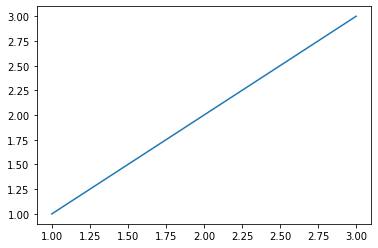

In [ ]:
plt.plot([1,2,3],[1,2,3])
plt.show()

## Leemos las redes desde drive

teamautofollow 0
rns 0
waystomakemehappy 1
soundcloud 0
youknowwhatannoysme 1
first20songsonshuffle 1
somefactsyoushouldknow 1
fail 0
ohwell 0
amitheonlyonethat 1
teamautofollow 0
rns 0
waystomakemehappy 1
soundcloud 0
youknowwhatannoysme 1
first20songsonshuffle 1
somefactsyoushouldknow 1
fail 0
ohwell 0
amitheonlyonethat 1
teamautofollow 0
rns 0
waystomakemehappy 1
soundcloud 0
youknowwhatannoysme 1
first20songsonshuffle 1
somefactsyoushouldknow 1
fail 0
ohwell 0
amitheonlyonethat 1
teamautofollow 0
rns 0
waystomakemehappy 1
soundcloud 0
youknowwhatannoysme 1
first20songsonshuffle 1
somefactsyoushouldknow 1
fail 0
ohwell 0
amitheonlyonethat 1
teamautofollow 0
rns 0
waystomakemehappy 1
soundcloud 0
youknowwhatannoysme 1
first20songsonshuffle 1
somefactsyoushouldknow 1
fail 0
ohwell 0
amitheonlyonethat 1
teamautofollow 0
rns 0
waystomakemehappy 1
soundcloud 0
youknowwhatannoysme 1
first20songsonshuffle 1
somefactsyoushouldknow 1
fail 0
ohwell 0
amitheonlyonethat 1
teamautofollow 0
rns 0

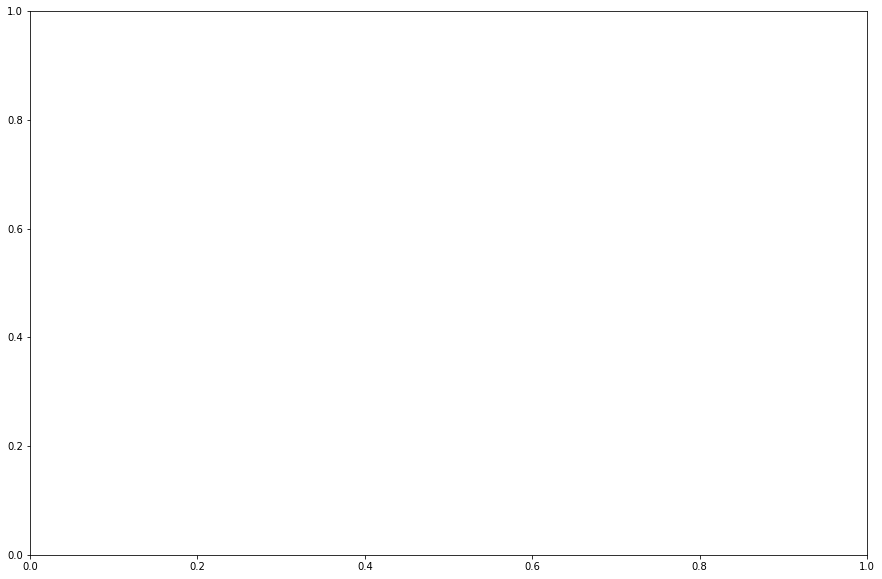

In [ ]:
import os

path_gecf_ = "/content/drive/MyDrive/NetworkAnalysis_TwitterTrends/data_max_interact"

fig, ax = plt.subplots()
fig.set_size_inches([15,10])

p_ = np.linspace(0,1,10)
#p = 0.5

dict_p_values = {}
list_b = []
list_trend = []
for gexf in os.listdir(path_gecf_)[0:10]:
    trend = gexf.split('.')[0] 
    b = B[ B['trend'] == trend]['burst'].to_list()[0]
    list_b.append(b)
    list_trend.append(trend)

dict_p_values['b'] = list_b
dict_p_values['trend'] = list_trend

i = 0
for p in p_:
  diff_b = []
  for gexf in os.listdir(path_gecf_)[0:10]:
    trend = gexf.split('.')[0] 
    b = B[ B['trend'] == trend]['burst'].to_list()[0]
    print(trend,b)
    G = nx.read_gexf("{}/{}".format(path_gecf_,gexf))

    dict_b_attrs = nx.get_node_attributes(G, 'b')
    list_active = [node for node in dict_b_attrs if dict_b_attrs[node] == 1]
    
    #list_active = max(nx.connected_components(G), key=len)

    #G = G.subgraph(list_active)
    #print( G.number_of_nodes(), G.number_of_edges())

    X, Y = generate_proccess_difusion(G,p)
    """
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    degreeCount = dict(collections.Counter(degree_sequence))
    """

    #X = list(degreeCount.keys())
    #Y = list(degreeCount.values()) / np.sum(list(degreeCount.values()))

    if b:
      #ax.plot(X,Y, marker='s', color = 'red')
      diff_b.append((Y[-1] - Y[0]) / Y[0])
    else:
      #ax.plot(X,Y, marker='s', color = 'c')
      diff_b.append((Y[-1] - Y[0]) / Y[0])
  key = 'p{}'.format(i)
  i+=1
  dict_p_values[key] = diff_b
plt.show()

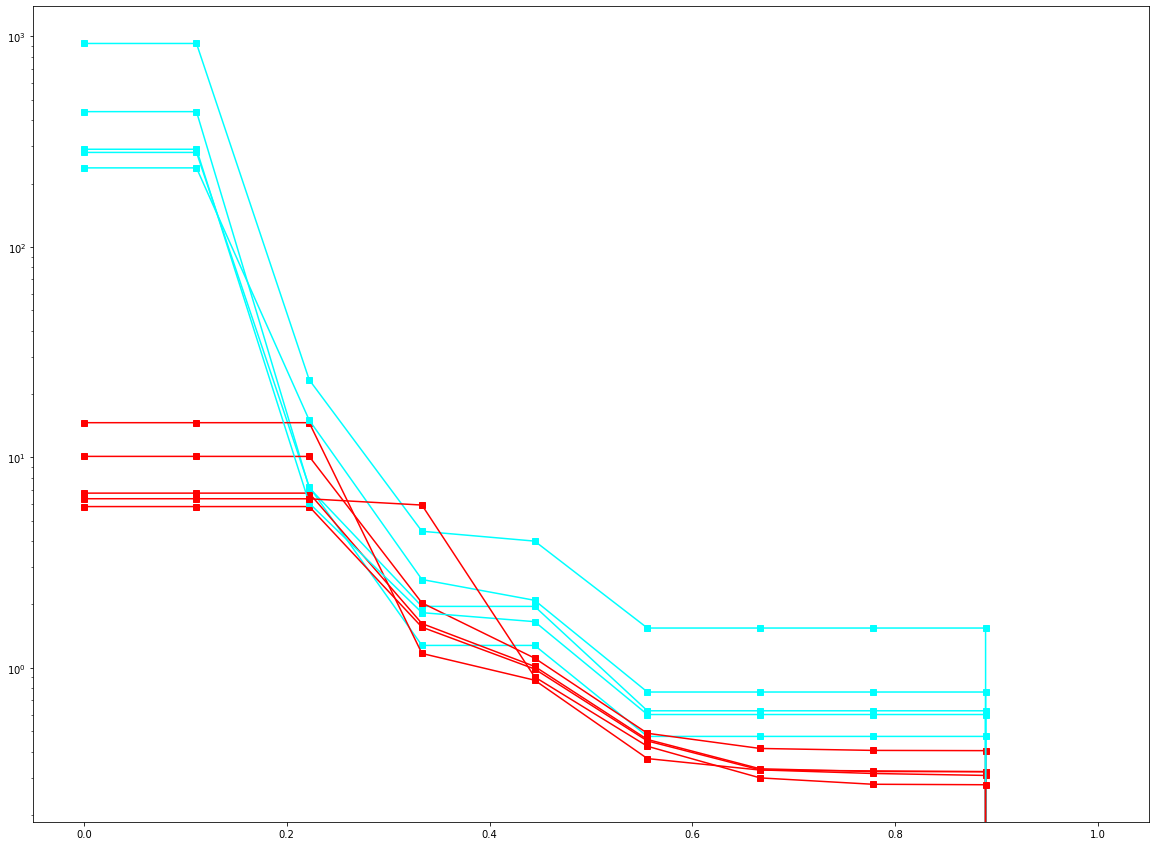

In [ ]:
df = pd.DataFrame.from_dict(dict_p_values)
df = df.set_index('trend')


#df.iloc[1:2,1:].to_numpy().tolist()[0]
#df.iloc[:,1:].to_numpy()
#df.iloc[:,0:1].to_numpy().tolist()
n = df.shape[0]

fig, ax = plt.subplots()
fig.set_size_inches([20,15])

for k in range(n):
  Y = df.iloc[:,1:].to_numpy().tolist()[k]
  b_ = df.iloc[:,0:1].to_numpy().tolist()[k][0]
  if b_ == 0:
    ax.plot(p_,Y, marker = 's', color = 'cyan',)
  else:
    ax.plot(p_,Y, marker = 's', color = 'red')
plt.semilogy()
plt.show()

In [ ]:
df.head()

,b,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9
trend,,,,,,,,,,,
teamautofollow,0,925.909091,925.909091,23.363636,4.454545,4.000000,1.545455,1.545455,1.545455,1.545455,0.0
rns,0,281.111111,281.111111,7.250000,1.277778,1.277778,0.472222,0.472222,0.472222,0.472222,0.0
waystomakemehappy,1,6.761398,6.761398,6.761398,1.623100,1.015198,0.456687,0.331307,0.321429,0.321429,0.0
soundcloud,0,439.208333,439.208333,7.166667,1.958333,1.958333,0.625000,0.625000,0.625000,0.625000,0.0
youknowwhatannoysme,1,10.107259,10.107259,10.101842,2.034670,1.111593,0.488624,0.413868,0.405200,0.404117,0.0


In [ ]:
def generate_proccess_difusion( G, p):
  """
  G: @Networkx.Graph with attributes of infect/non infect
  initial_nodes: @lis of nodes
  p: @float threshold to infect
  """  
  G_foo = G.copy()

  if_is_s = True

  N = G_foo.number_of_nodes()
  dict_nodes_ = nx.get_node_attributes(G_foo, 'b')
  active = len([node for node in dict_nodes_ if dict_nodes_[node] == 1])

  x_axis_t = [0]
  y_axis_t = [active / N]

  #paso antes
  dict_before = dict_nodes_
  
  while if_is_s:
    list_non_active = [node for node in dict_before if dict_before[node] == 0]

    #Paso actual
    dict_state = dict_before.copy()

    for node in list_non_active:
      vecinos = list(G_foo.neighbors(node))
      n_vecinos = len(list(vecinos))
      n_activos = np.sum([ dict_before[vecino] for vecino in vecinos])
      node_is_I = (n_activos / n_vecinos > p)

      if node_is_I:
        dict_state[node] = 1
    
    len_active = len([node for node in dict_state if dict_state[node] == 1])
    x_axis_t.append(x_axis_t[-1] + 1 )
    y_axis_t.append( len_active / N)

    if dict_state == dict_before:
      if_is_s = False
    else:
      dict_before = dict_state.copy()
  return x_axis_t, y_axis_t

## Sobre k core

In [ ]:
dict_cores_trend = {}
path_gecf_ = "/content/drive/MyDrive/NetworkAnalysis_TwitterTrends/data_max_interact"
for gexf in os.listdir(path_gecf_)[:]:
  trend = gexf.split('.')[0] 
  b = B[ B['trend'] == trend]['burst'].to_list()[0]
 
  G = nx.read_gexf("{}/{}".format(path_gecf_,gexf))
  dict_cores_trend[trend] = nx.core_number(G)

In [ ]:
dict_fi_trends = {}
for trend in list(dict_of_max_graph.keys())[:]:
  df = dict_of_max_graph[trend]['df_GT']
  dict_nt = df['userid'].value_counts().to_dict()
  dict_ft = dict([ (uid ,df[ df['userid'] == uid ]['time'].min()) for uid in dict_nt.keys()])
  dict_trend = {}
  for uid in dict_nt.keys():
    dict_trend[uid] = {'nt': dict_nt[uid],
                       'ft': dict_ft[uid]}
  dict_fi_trends[trend] = dict_trend

In [ ]:
fig, ax = plt.subplots()

for trend in list(dict_cores_trend.keys())[0:10]:
  print(trend)
  dict_cores = dict_cores_trend[trend]
  dict_fi_uid = dict_fi_trends[trend]

  b = B[ B['trend'] == trend]['burst'].to_list()[0]
  X = []
  Y = []

  
  for uid in dict_fi_uid:
    if uid in dict_cores:
      k_core = dict_cores[uid]
      dict_fi = dict_fi_uid[uid]
      nt = dict_fi['nt']
      X.append(k_core)
      Y.append(nt)
    if b:
      ax.scatter(X,Y, color ='red', marker='s')
    else:
      ax.scatter(X,Y, color ='cyan', marker='s')
plt.show()

In [ ]:
trend = os.listdir(path_gecf_)[0:1][0].split('.')[0]
type(dict_fi_trends[trend]['172546']['ft'])


pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
path_gecf_final = "/content/drive/MyDrive/NetworkAnalysis_TwitterTrends/data_max_new"
path_gecf_ = "/content/drive/MyDrive/NetworkAnalysis_TwitterTrends/data_max_interact"
#for trend in list(dict_cores_trend.keys())[0:10]:
  #dict clustering 
  #dict_clus = nx.clustering(G)
  #dict k-core 
#  dict_cores = dict_cores_trend[trend]
 
for gexf in os.listdir(path_gecf_)[:]:
  trend = gexf.split('.')[0] 
  b = B[ B['trend'] == trend]['burst'].to_list()[0]
 
  print(trend)
 
  G = nx.read_gexf("{}/{}".format(path_gecf_,gexf))
 
  #Obtenemos los diccionarios. 
  #dict k-core 
  dict_cores = dict_cores_trend[trend]
 
  #Tiempo y cantidad
  dict_foo_users = dict_fi_trends[trend]
  max_time = max([dict_foo_foo['ft'] for dict_foo_foo in dict_fi_trends[trend].values()])
  max_time = max_time.isoformat(sep=' ')
  dict_ft = {}
  dict_nt = {}
 
  for node in G.nodes():
    if node in dict_foo_users:
      dict_ft[node] = dict_foo_users[node]['ft'].isoformat(sep=' ')
      dict_nt[node] = dict_foo_users[node]['nt']
    else:
      dict_ft[node] = max_time
      dict_nt[node] = 0
  nx.set_node_attributes(G,dict_cores, 'core')
  nx.set_node_attributes(G,dict_ft, 'ft')
  nx.set_node_attributes(G,dict_nt, 'nt')
 
  nx.write_gexf(G, "/content/drive/MyDrive/NetworkAnalysis_TwitterTrends/data_max_new/{}.gexf".format(trend))

teamautofollow
rns
waystomakemehappy
soundcloud
first20songsonshuffle
youknowwhatannoysme
somefactsyoushouldknow
ohwell
fail
10thingsihate
amitheonlyonethat
10peopleontwitteriwanttomeet
autofollowback
mythoughtsduringsex
arentyoutiredof
wewontworkoutif
youdontbelongontwitterif
team
fml
liestoldontwitter
respect
bizitalk
whatmakesmesmile
thingspeopledothatgetonmynerves
thatisall
classic
weed
teamheat
libras
ididnttextyouback
thingsblackpeopletakeseriously
followme
followngain
egypt
tweetyourheight
backinthedaywheniwasakid
scorpios
lolatgirlswho
ifitwasuptome
truestory
ijs
thingsisaywhilereadingmytl
twitterpeopleilove
mythoughtsduringschool
reasonsthatimsingle
thatirritatesme
thestruggle
butyouathug
iwanttopunchpeoplewho
1dfacts
gop
sometimesijustwant
randomtweet
thuglife
itscutewhen
itscrazyhow
imhappywhen
ifollowback
lmao
twothingsthatdontmix
iwonderif
mentionto
thingsthatfrustrateme
thingsilovetosee
justsayin
thingsthatguyslike
immadbecause
itstimeforyoutorealize
music
top100lies
imsi

In [ ]:
np.unique(list(nx.get_node_attributes(G,'ft').values()))

array(['2012-04-07 21:01:14', '2012-04-07 21:04:39',
       '2012-04-07 21:17:39', '2012-04-07 21:23:37',
       '2012-04-07 21:26:43', '2012-04-07 21:28:14',
       '2012-04-07 21:32:23', '2012-04-07 21:55:39',
       '2012-04-07 21:56:39', '2012-04-07 21:57:08',
       '2012-04-07 21:58:19'], dtype='<U19')

# Networkit 

------------------- teamautofollow 0 -------------------
PLM(balanced,pc,turbo) detected communities in 0.04768681526184082 [s]
solution properties:
-------------------  -----------
# communities          20
min community size      3
max community size   2002
avg. community size   504.45
modularity              0.452467
-------------------  -----------
------------------- rns 0 -------------------
PLM(balanced,pc,turbo) detected communities in 0.03759336471557617 [s]
solution properties:
-------------------  -----------
# communities          23
min community size      2
max community size   3767
avg. community size   438.478
modularity              0.575933
-------------------  -----------
------------------- waystomakemehappy 1 -------------------
PLM(balanced,pc,turbo) detected communities in 0.02786540985107422 [s]
solution properties:
-------------------  -----------
# communities          51
min community size      3
max community size   1728
avg. community size   186.902
modular

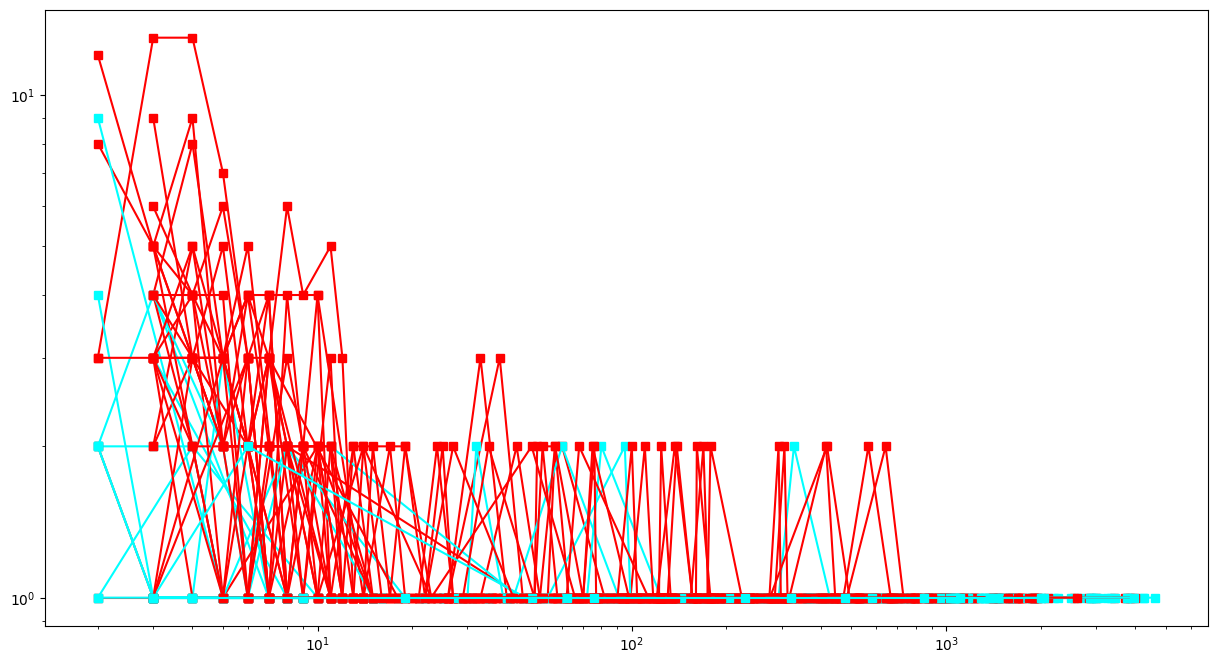

In [ ]:
import os

path_gecf_ = "/content/drive/MyDrive/NetworkAnalysis_TwitterTrends/data_max_interact"

plt.style.use('default')
fig, ax = plt.subplots()
fig.set_size_inches([15,8])

list_trend = {}
for gexf in os.listdir(path_gecf_)[0:10]:
    trend = gexf.split('.')[0] 
    b = B[ B['trend'] == trend]['burst'].to_list()[0]
    list_trend[trend] = b

for gexf in os.listdir(path_gecf_)[0:50]:
  trend = gexf.split('.')[0] 
  b = B[ B['trend'] == trend]['burst'].to_list()[0]

  G = nx.read_gexf("{}/{}".format(path_gecf_,gexf))
  nkG = nk.nxadapter.nx2nk(G)
  cc = nk.components.ConnectedComponents(nkG)
  cc.run()

  G = cc.extractLargestConnectedComponent(nkG)
  print("-------------------",trend, b,"-------------------")
  community = nk.community.detectCommunities(G)

  list_size_com = sorted( list(dict(collections.Counter(community.getVector())).values()), reverse=False)
  dict_sizes = dict(collections.Counter(list_size_com ))
  X = list(dict_sizes.keys())
  Y = list(dict_sizes.values())

  if b:
    plt.loglog(X,Y, marker = 's',color = 'red')
  else:
    plt.loglog(X,Y, marker = 's', color = 'cyan')

plt.show()

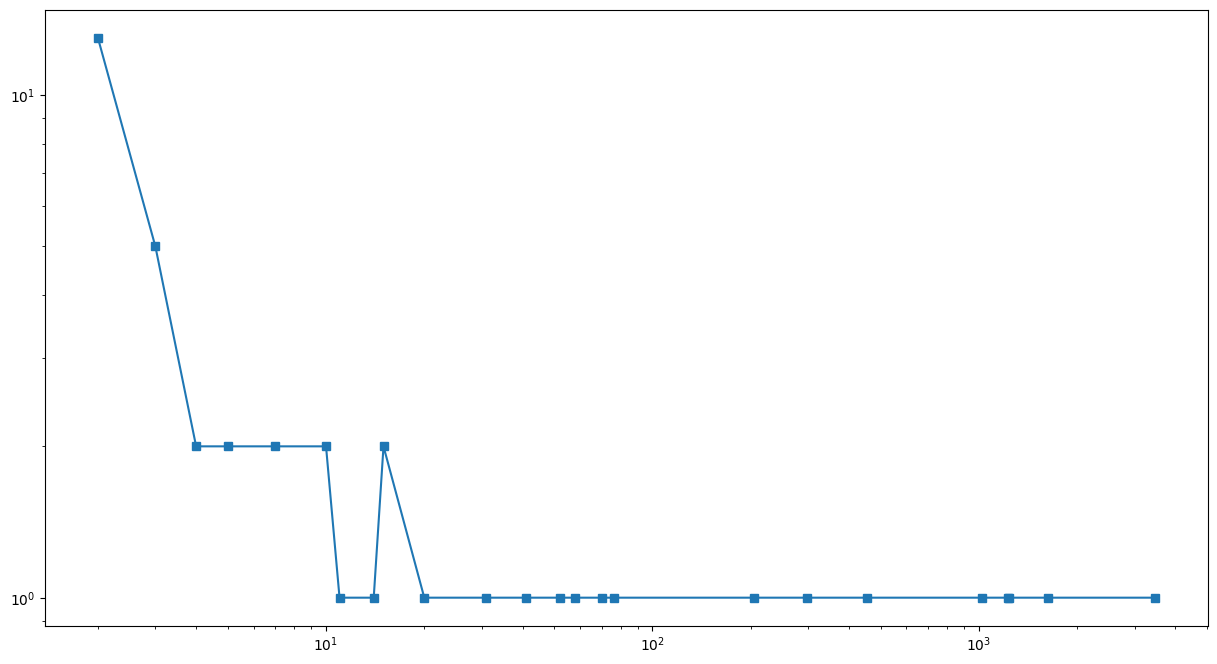

In [ ]:
list_size_com = sorted( list(dict(collections.Counter(community.getVector())).values()), reverse=False)
dict_sizes = dict(collections.Counter(list_size_com ))
X = list(dict_sizes.keys())
Y = list(dict_sizes.values())

plt.style.use('default')
fig, ax = plt.subplots()
fig.set_size_inches([15,8])
plt.loglog(X,Y, marker = 's')
plt.show()


In [ ]:
nk.setNumberOfThreads(4)